In [ ]:
# matplotlib 한글 깨짐방지
# 아래 코드 실행후 '런타임 다시시작' 후 모듈 불러오기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,160 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126111 files and dire

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

plt.rc('font', family='NanumBarunGothic') # matplotlib 한글 깨짐 방지

# 시각화에 사용할 팔레트
plt.style.available

sns.color_palette("pastel")
sns.set(palette='pastel')

# **0. 데이터 로드**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df_filled = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/날씨빅콘/weather_data_imputed2.csv')
df_filled

tm branch_id    ta     wd   ws  rn_day  rn_hr1    hm  \
0       2021-01-01 01:00:00         A -10.1   78.3  0.5     0.0     0.0  68.2   
1       2021-01-01 02:00:00         A -10.2   71.9  0.6     0.0     0.0  69.9   
2       2021-01-01 03:00:00         A -10.0  360.0  0.0     0.0     0.0  69.2   
3       2021-01-01 04:00:00         A  -9.3  155.9  0.5     0.0     0.0  65.0   
4       2021-01-01 05:00:00         A  -9.0   74.3  1.9     0.0     0.0  63.5   
...                     ...       ...   ...    ...  ...     ...     ...   ...   
499296  2023-12-31 19:00:00         S   3.2  233.5  0.4     2.5     0.0  91.5   
499297  2023-12-31 20:00:00         S   2.9  227.4  0.1     2.5     0.0  92.1   
499298  2023-12-31 21:00:00         S   2.1  360.0  0.0     2.5     0.0  93.3   
499299  2023-12-31 22:00:00         S   2.2   30.0  1.4     2.5     0.0  95.5   
499300  2023-12-31 23:00:00         S   1.2  359.0  0.8     2.5     0.0  94.9   

         si  ta_chi  ...        date  year  month  day  hour  quarter  \
0       0.0    -8.2  ...  2021-01-01  2021      1    1     1        1   
1       0.0    -8.6  ...  2021-01-01  2021      1    1     2        1   
2       0.0    -8.8  ...  2021-01-01  2021      1    1     3        1   
3       0.0    -8.9  ...  2021-01-01  2021      1    1     4        1   
4       0.0    -9.2  ...  2021-01-01  2021      1    1     5        1   
...     ...     ...  ...         ...   ...    ...  ...   ...      ...   
499296  0.0     2.8  ...  2023-12-31  2023     12   31    19        4   
499297  0.0     2.7  ...  2023-12-31  2023     12   31    20        4   
499298  0.0     1.4  ...  2023-12-31  2023     12   31    21        4   
499299  0.0     1.3  ...  2023-12-31  2023     12   31    22        4   
499300  0.0     0.6  ...  2023-12-31  2023     12   31    23        4   

        day_of_week  season is_weekend hour_group  
0                 4  Winter    Weekday          0  
1                 4  Winter    Weekday          0  
2                 4  Winter    Weekday          1  
3                 4  Winter    Weekday          1  
4                 4  Winter    Weekday          1  
...             ...     ...        ...        ...  
499296            6  Winter    Weekend          6  
499297            6  Winter    Weekend          6  
499298            6  Winter    Weekend          7  
499299            6  Winter    Weekend          7  
499300            6  Winter    Weekend          7  

[499301 rows x 21 columns]

In [ ]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499301 entries, 0 to 499300
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   tm           499301 non-null  object 
 1   branch_id    499301 non-null  object 
 2   ta           499301 non-null  float64
 3   wd           499301 non-null  float64
 4   ws           499301 non-null  float64
 5   rn_day       499301 non-null  float64
 6   rn_hr1       499301 non-null  float64
 7   hm           499301 non-null  float64
 8   si           499301 non-null  float64
 9   ta_chi       499301 non-null  float64
 10  heat_demand  499278 non-null  float64
 11  date         499301 non-null  object 
 12  year         499301 non-null  int64  
 13  month        499301 non-null  int64  
 14  day          499301 non-null  int64  
 15  hour         499301 non-null  int64  
 16  quarter      499301 non-null  int64  
 17  day_of_week  499301 non-null  int64  
 18  season       499301 non-

* 음수가 나오면 안 되는 칼럼: 풍향 (wd), 일사량 (si), 풍속 (ws), 강수량 (rn_day, rn_hr1)

In [4]:
# 클리핑

# 풍향 범위는 0~360도
df_filled['wd'] = df_filled['wd'] % 360

# 일사량, 풍속, 강수량 등은 0 이상만 허용
for col in ['si', 'ws', 'rn_day', 'rn_hr1']:
    df_filled[col] = df_filled[col].clip(lower=0)


# **1. 변수**

## **1-1. 파생변수 생성**

#### **(1) lag, 이동평균 변수**

* 브랜치별로 적용

* 적용 변수: 기온, 풍속, 1시간 강수량, 상대습도, 일사량, 체감온도

* 풍향은 범주형이므로 X

* 일강수량은 이미 누적 값이므로 X

| 변수명          |  lag                  | 이동평균                 |
| ------------ | ----------------------- | ----------------------- |
| ta           | lag\_1, lag\_3          | rolling\_3, rolling\_24 |
| ws           | lag\_1                  | rolling\_3              |
| rn\_hr1      | lag\_1                  | rolling\_3              |
| hm           | lag\_1, lag\_3          | rolling\_3              |
| si           | lag\_1, lag\_3          | rolling\_3, rolling\_24 |
| ta\_chi      | lag\_1                  | rolling\_3              |
| heat\_demand | lag\_1, lag\_3, lag\_24 | rolling\_3, rolling\_24 |


In [5]:
# 적용할 변수들
lag_cols = ['ta', 'ws', 'rn_hr1', 'hm', 'si', 'ta_chi']
rolling_cols = ['ta', 'ws', 'rn_hr1', 'hm', 'si', 'ta_chi']

# lag/rolling 설정
lag_hours = [1, 3, 24]
rolling_hours = [3, 24]

# 결과 저장 리스트
dfs = []

# branch별 처리
for branch, group in df_filled.groupby('branch_id'):
    df_branch = group.sort_values('tm').copy()

    # lag 변수 생성
    for col in lag_cols:
        for lag in lag_hours:
            new_col = f'{col}_lag{lag}'
            df_branch[new_col] = df_branch[col].shift(lag)

    # 이동평균 변수 생성 (과거 값만 반영)
    for col in rolling_cols:
        for window in rolling_hours:
            new_col = f'{col}_roll{window}'
            df_branch[new_col] = df_branch[col].shift(1).rolling(window=window).mean()

    # 처리된 브랜치 저장
    dfs.append(df_branch)

# 브랜치 합치기
df_filled = pd.concat(dfs, axis=0).sort_values(['branch_id', 'tm']).reset_index(drop=True)

In [6]:
# NA 삭제
df_filled = df_filled.dropna().reset_index(drop=True)

In [7]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498822 entries, 0 to 498821
Data columns (total 51 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tm             498822 non-null  object 
 1   branch_id      498822 non-null  object 
 2   ta             498822 non-null  float64
 3   wd             498822 non-null  float64
 4   ws             498822 non-null  float64
 5   rn_day         498822 non-null  float64
 6   rn_hr1         498822 non-null  float64
 7   hm             498822 non-null  float64
 8   si             498822 non-null  float64
 9   ta_chi         498822 non-null  float64
 10  heat_demand    498822 non-null  float64
 11  date           498822 non-null  object 
 12  year           498822 non-null  int64  
 13  month          498822 non-null  int64  
 14  day            498822 non-null  int64  
 15  hour           498822 non-null  int64  
 16  quarter        498822 non-null  int64  
 17  day_of_week    498822 non-nul

#### **(2) 강우 강도**

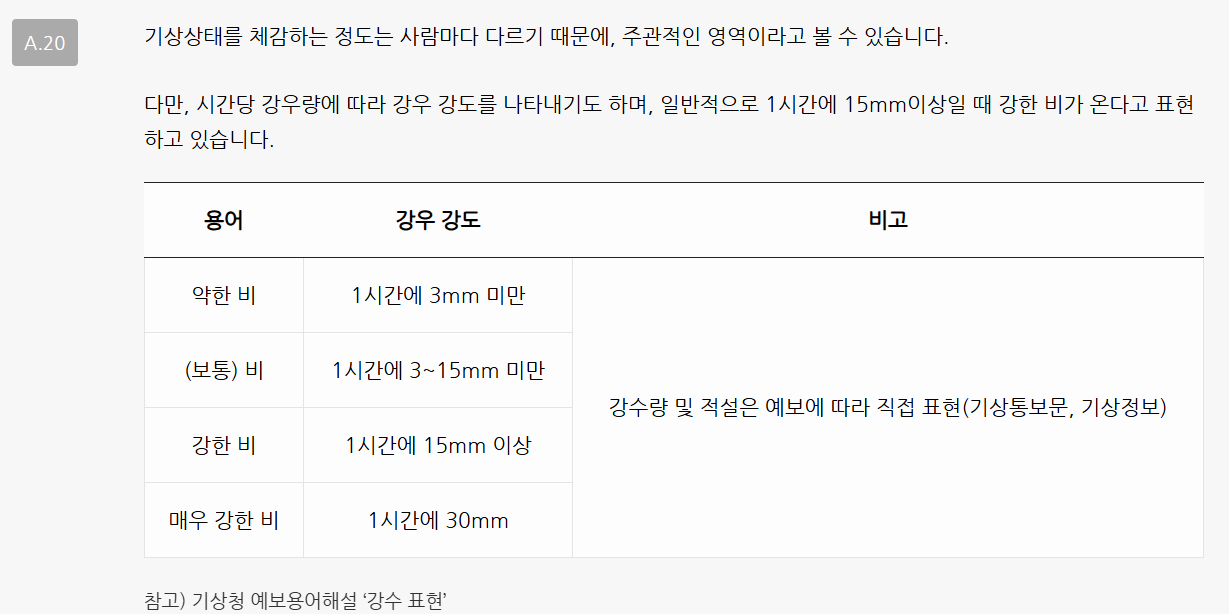

* <3 미만이면 'weak'

* 3 이상 15 미만 'normal'

* 15 이상 30 미만 'strong'

* 30 이상 'very strong'

In [8]:
# 강우 강도
conditions = [
    df_filled['rn_hr1'] < 3,
    (df_filled['rn_hr1'] >= 3) & (df_filled['rn_hr1'] < 15),
    (df_filled['rn_hr1'] >= 15) & (df_filled['rn_hr1'] < 30),
    df_filled['rn_hr1'] >= 30
]

choices = ['weak', 'normal', 'strong', 'very strong']

df_filled['rain_intensity'] = np.select(conditions, choices, default='unknown')

In [9]:
df_filled['rain_intensity'].value_counts()

rain_intensity
weak           491756
normal           6383
strong            563
very strong       120
Name: count, dtype: int64

#### **(3) 폭염/한파 변수**

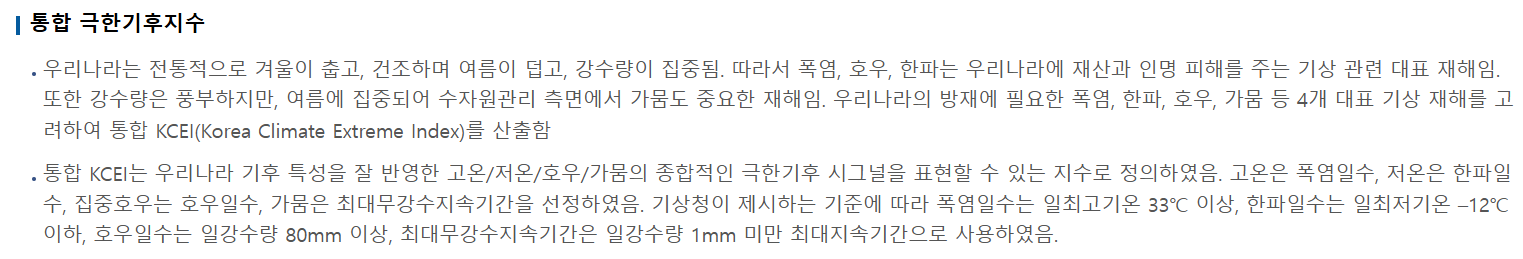


* 폭염: 일최고기온이 33도 이상이면 그날 모두 1, 아니면 0

* 한파: 일최저기온이 -12도 이하이면 그날 모두 1, 아니면 0

In [10]:
# 날짜별로 일최고기온과 일최저기온 계산
daily_temp = df_filled.groupby('date').agg(ta_max=('ta', 'max'), ta_min=('ta', 'min')).reset_index()

# 조건에 맞게 폭염 및 한파 플래그 설정
daily_temp['heatwave'] = (daily_temp['ta_max'] >= 33).astype(int)
daily_temp['coldwave'] = (daily_temp['ta_min'] <= -12).astype(int)

# 원본 데이터에 병합
df_filled = df_filled.merge(daily_temp[['date', 'heatwave', 'coldwave']], on='date', how='left')

In [11]:
df_filled['heatwave'].value_counts()

heatwave
0    443650
1     55172
Name: count, dtype: int64

In [12]:
df_filled['coldwave'].value_counts()

coldwave
0    471937
1     26885
Name: count, dtype: int64

#### **(4) 시간 변수 sin, cos 변환**

In [13]:
# 시간 기반 순환 특성 (sin, cos 변환)

# hour
df_filled['hour_sin'] = np.sin(2 * np.pi * df_filled['hour'] / 24)
df_filled['hour_cos'] = np.cos(2 * np.pi * df_filled['hour'] / 24)

# month
df_filled['month_sin'] = np.sin(2 * np.pi * df_filled['month'] / 12)
df_filled['month_cos'] = np.cos(2 * np.pi * df_filled['month'] / 12)

In [14]:
df_filled['hour_sin']

0         0.258819
1         0.500000
2         0.707107
3         0.866025
4         0.965926
            ...   
498817   -0.965926
498818   -0.866025
498819   -0.707107
498820   -0.500000
498821   -0.258819
Name: hour_sin, Length: 498822, dtype: float64

#### **(5) 체감온도와 실제 온도 차이**

* 체감온도 - 실제 온도

In [15]:
# 체감온도와 실제 온도의 차이
df_filled['ta_diff_chi'] = df_filled['ta_chi'] - df_filled['ta']

In [16]:
df_filled['ta_diff_chi'].describe()

count    498822.000000
mean          0.404341
std           2.294188
min         -10.300000
25%          -0.800000
50%           0.100000
75%           1.500000
max          16.458740
Name: ta_diff_chi, dtype: float64

#### **(6) 냉난방 필요한 온도 기준**

* 주거용 에너지 분석 등에서 사용되는 대표적인 지표

In [17]:
# 냉난방 필요 정도 계산
df_filled['heating_degree'] = (18 - df_filled['ta']).clip(lower=0)  # 18도 이하일 때 난방 필요
df_filled['cooling_degree'] = (df_filled['ta'] - 24).clip(lower=0)  # 24도 초과일 때 냉방 필요

#### **(7) 풍향 sin, cos 변환**

In [18]:
# 풍향 sin, cos 변환
df_filled['wd_rad'] = np.deg2rad(df_filled['wd'])  # 도 → 라디안 변환
df_filled['wd_sin'] = np.sin(df_filled['wd_rad'])
df_filled['wd_cos'] = np.cos(df_filled['wd_rad'])

#### **(8) 낮시간대 구분(day_flag)**

* 12-18시는 1, 나머지는 0으로 구분

In [19]:
'''
# 시간별 heat_demand 평균 계산
hourly_avg = df_filled.groupby('hour')['heat_demand'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_avg, x='hour', y='heat_demand', marker='o')
plt.title('Average Heat Demand by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Heat Demand (Gcal/h)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()
'''

"\n# 시간별 heat_demand 평균 계산\nhourly_avg = df_filled.groupby('hour')['heat_demand'].mean().reset_index()\n\n# 시각화\nplt.figure(figsize=(10, 6))\nsns.lineplot(data=hourly_avg, x='hour', y='heat_demand', marker='o')\nplt.title('Average Heat Demand by Hour')\nplt.xlabel('Hour of Day')\nplt.ylabel('Average Heat Demand (Gcal/h)')\nplt.xticks(range(0, 24))\nplt.grid(True)\nplt.tight_layout()\nplt.show()\n"

In [20]:
# df_filled['day_flag'] = df_filled['hour'].apply(lambda x: 1 if 12 <= x <= 18 else 0)

#### **(9) 월별 시즌 구분 (season_group)**

| 그룹 이름 (`season_group`) | 해당 월       | 의미             |
| ---------------------- | ---------- | -------------- |
| `summer`               | 6, 7, 8, 9 | 냉방기 또는 여름철     |
| `early_winter`         | 3, 11      | 이른 봄/늦가을 (전환기) |
| `mid_season`           | 4, 5, 10   | 완연한 간절기        |
| `winter`               | 1, 2, 12   | 난방기 (혹한기)      |


<ipython-input-21-1583248517>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='heat_demand', data=df_filled, palette='turbo')


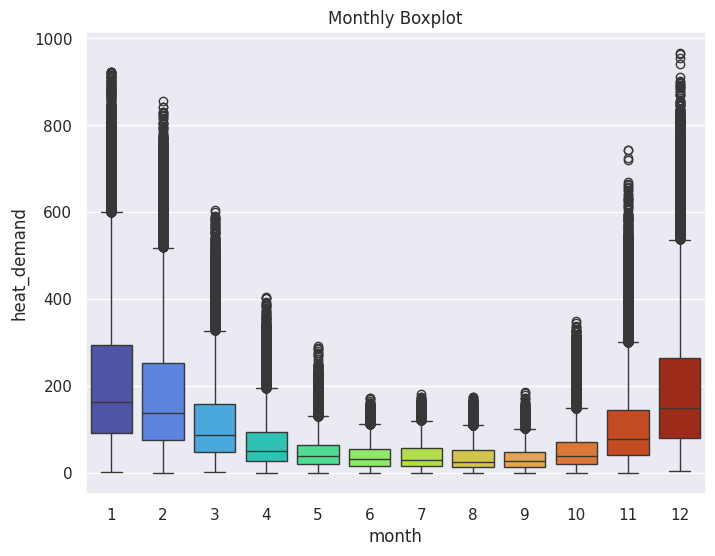

In [21]:
# 월별 heat_demand

plt.figure(figsize=(8,6))
sns.boxplot(x='month', y='heat_demand', data=df_filled, palette='turbo')
plt.title('Monthly Boxplot')
plt.show()

In [22]:
def classify_season_v2(month):
    if month in [6, 7, 8, 9]:
        return 'summer'           # 여름
    elif month in [3, 11]:
        return 'early_winter'     # 초겨울/초봄
    elif month in [4, 5, 10]:
        return 'mid_season'       # 간절기
    elif month in [1, 2, 12]:
        return 'winter'           # 한겨울

df_filled['season_group'] = df_filled['month'].apply(classify_season_v2)


#### **(10) 브랜치별 온도 구간 구분 (ta_zone)**

* 각 브랜치별로 추세 변화점 기준으로 구간 분류


📊 브랜치별 추세 변화 지점 요약:
 - Branch A: x0 ≈ -4.60°C, x1 ≈ 16.51°C
 - Branch B: x0 ≈ -7.52°C, x1 ≈ 16.92°C
 - Branch C: x0 ≈ -4.19°C, x1 ≈ 18.07°C
 - Branch D: x0 ≈ -4.13°C, x1 ≈ 14.22°C
 - Branch E: x0 ≈ 10.86°C, x1 ≈ 23.04°C
 - Branch F: x0 ≈ -7.58°C, x1 ≈ 13.99°C
 - Branch G: x0 ≈ -7.50°C, x1 ≈ 17.02°C
 - Branch H: x0 ≈ -5.72°C, x1 ≈ 16.38°C
 - Branch I: x0 ≈ -6.26°C, x1 ≈ 15.77°C
 - Branch J: x0 ≈ 13.76°C, x1 ≈ 21.94°C
 - Branch K: x0 ≈ -4.70°C, x1 ≈ 17.85°C
 - Branch L: x0 ≈ -0.70°C, x1 ≈ 17.96°C
 - Branch M: x0 ≈ -0.30°C, x1 ≈ 18.05°C
 - Branch N: x0 ≈ -2.58°C, x1 ≈ 17.37°C
 - Branch O: x0 ≈ -5.00°C, x1 ≈ 17.04°C
 - Branch P: x0 ≈ -7.30°C, x1 ≈ 17.81°C
 - Branch Q: x0 ≈ -9.10°C, x1 ≈ 17.09°C
 - Branch R: x0 ≈ -6.10°C, x1 ≈ 18.80°C
 - Branch S: x0 ≈ -8.83°C, x1 ≈ 17.29°C


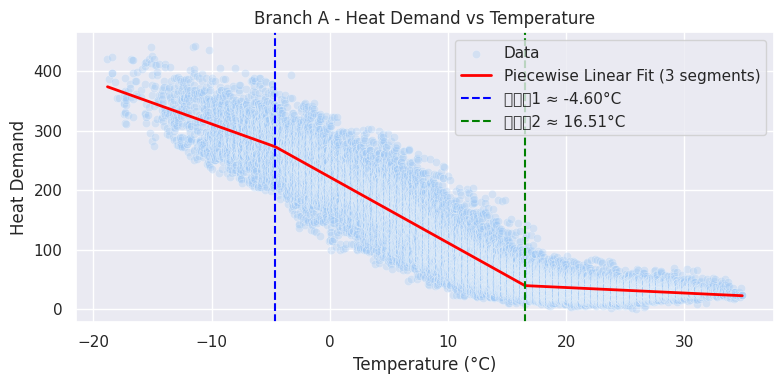

📌 Branch A 추세 변화 지점:
 - 변화점 1 (x0): -4.60 °C
 - 변화점 2 (x1): 16.51 °C



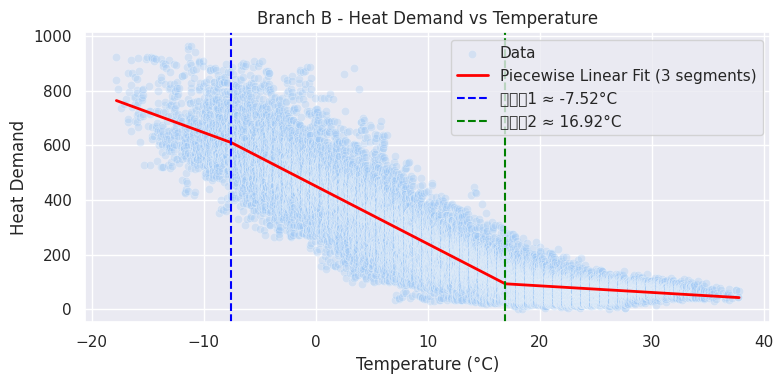

📌 Branch B 추세 변화 지점:
 - 변화점 1 (x0): -7.52 °C
 - 변화점 2 (x1): 16.92 °C



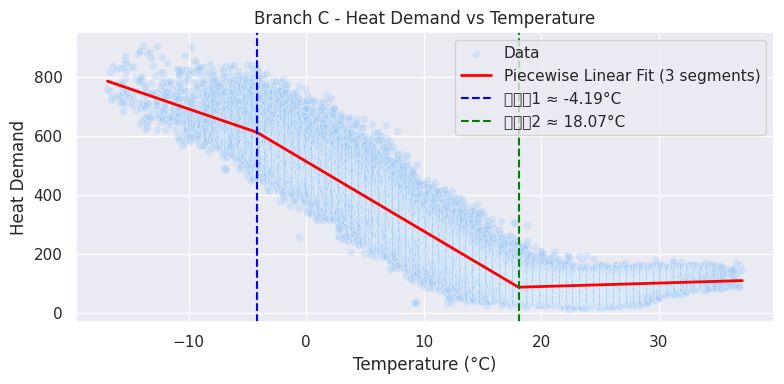

📌 Branch C 추세 변화 지점:
 - 변화점 1 (x0): -4.19 °C
 - 변화점 2 (x1): 18.07 °C



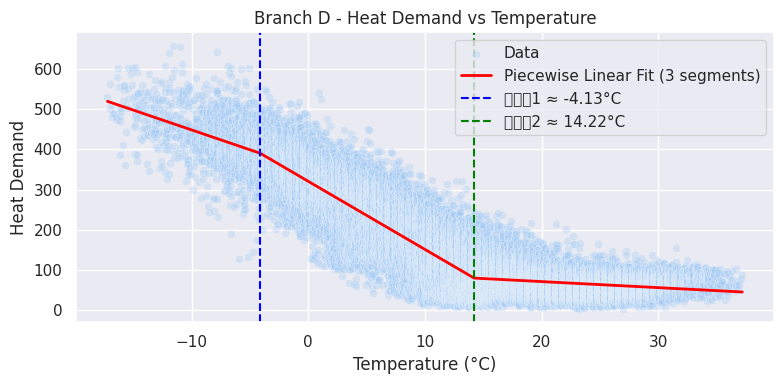

📌 Branch D 추세 변화 지점:
 - 변화점 1 (x0): -4.13 °C
 - 변화점 2 (x1): 14.22 °C



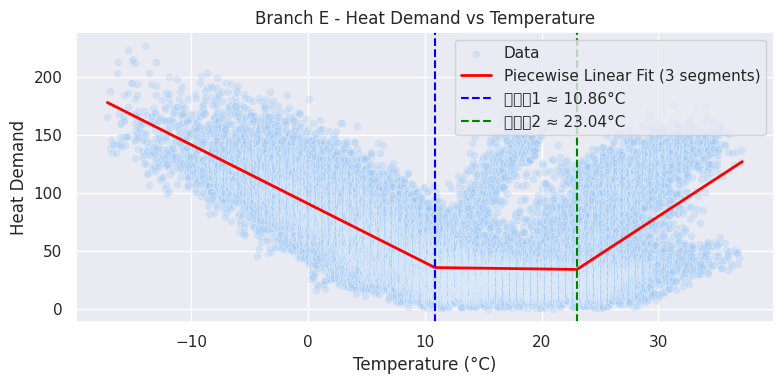

📌 Branch E 추세 변화 지점:
 - 변화점 1 (x0): 10.86 °C
 - 변화점 2 (x1): 23.04 °C



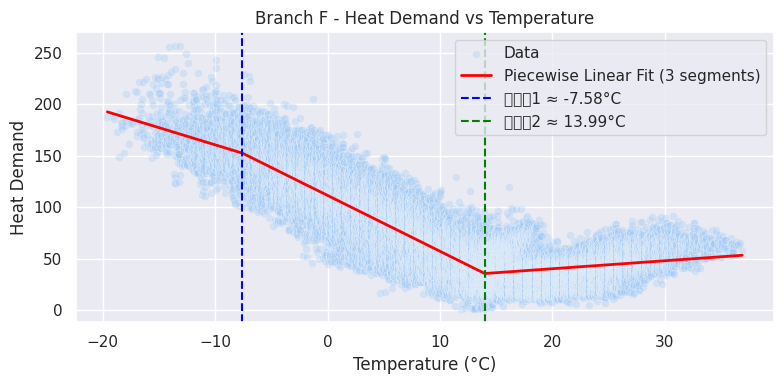

📌 Branch F 추세 변화 지점:
 - 변화점 1 (x0): -7.58 °C
 - 변화점 2 (x1): 13.99 °C



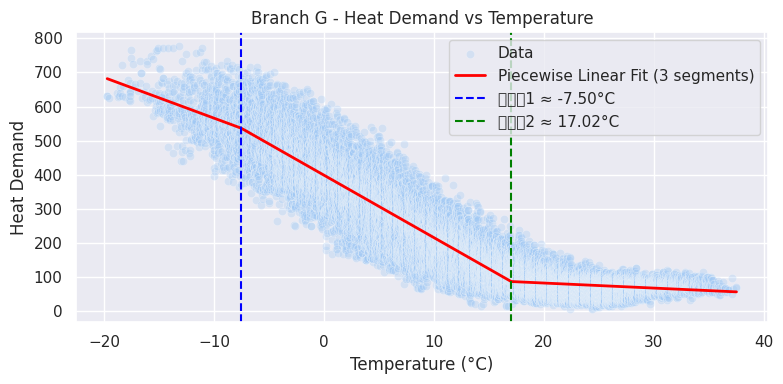

📌 Branch G 추세 변화 지점:
 - 변화점 1 (x0): -7.50 °C
 - 변화점 2 (x1): 17.02 °C



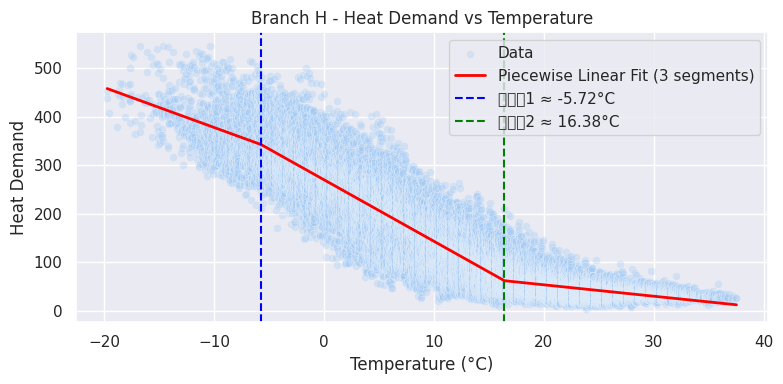

📌 Branch H 추세 변화 지점:
 - 변화점 1 (x0): -5.72 °C
 - 변화점 2 (x1): 16.38 °C



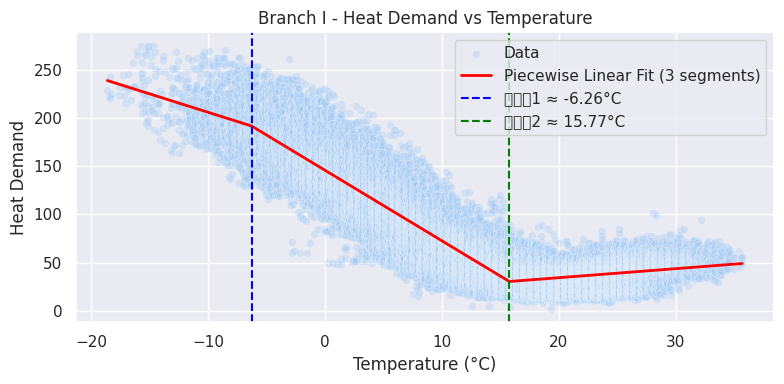

📌 Branch I 추세 변화 지점:
 - 변화점 1 (x0): -6.26 °C
 - 변화점 2 (x1): 15.77 °C



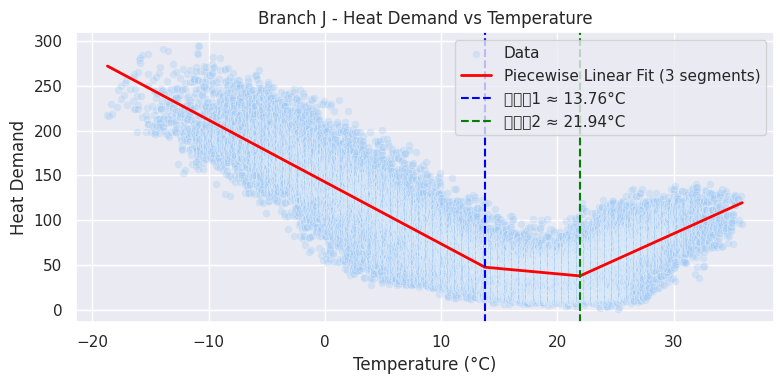

📌 Branch J 추세 변화 지점:
 - 변화점 1 (x0): 13.76 °C
 - 변화점 2 (x1): 21.94 °C



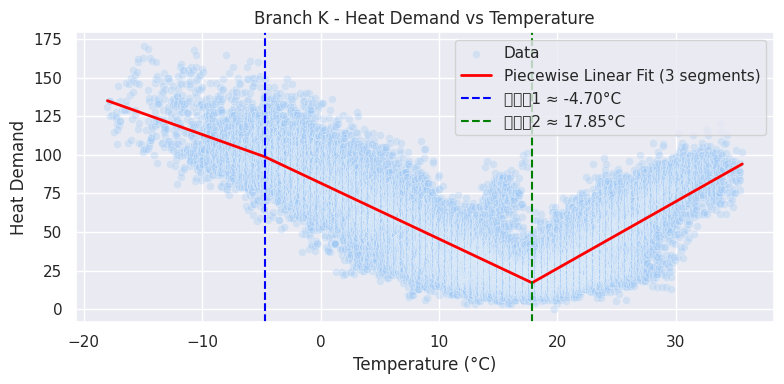

📌 Branch K 추세 변화 지점:
 - 변화점 1 (x0): -4.70 °C
 - 변화점 2 (x1): 17.85 °C



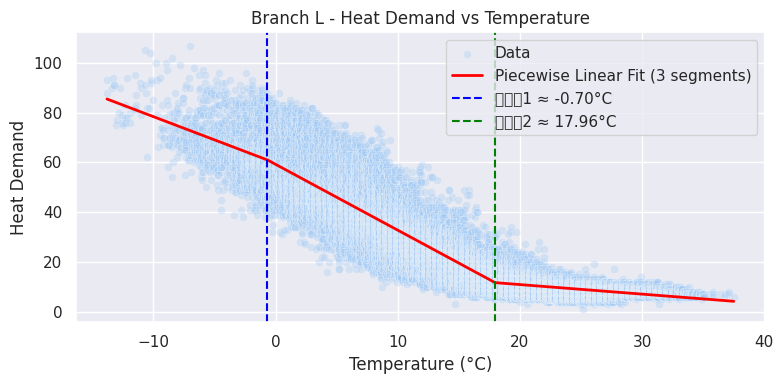

📌 Branch L 추세 변화 지점:
 - 변화점 1 (x0): -0.70 °C
 - 변화점 2 (x1): 17.96 °C



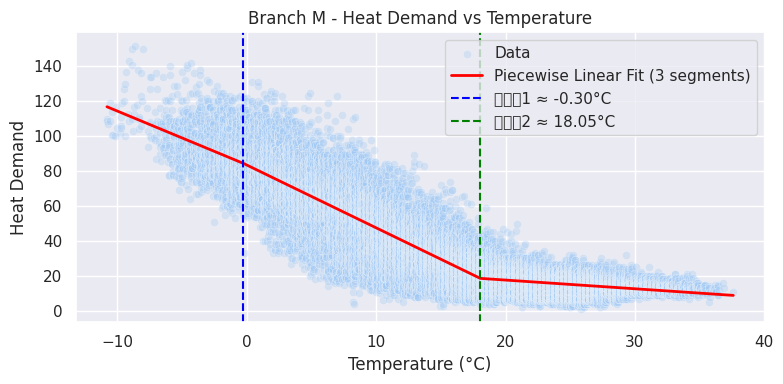

📌 Branch M 추세 변화 지점:
 - 변화점 1 (x0): -0.30 °C
 - 변화점 2 (x1): 18.05 °C



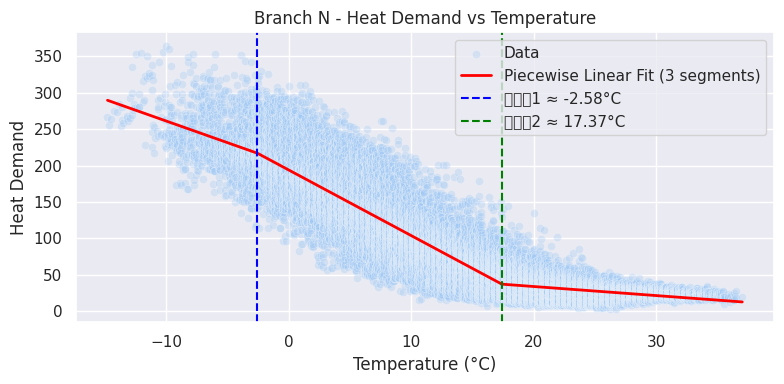

📌 Branch N 추세 변화 지점:
 - 변화점 1 (x0): -2.58 °C
 - 변화점 2 (x1): 17.37 °C



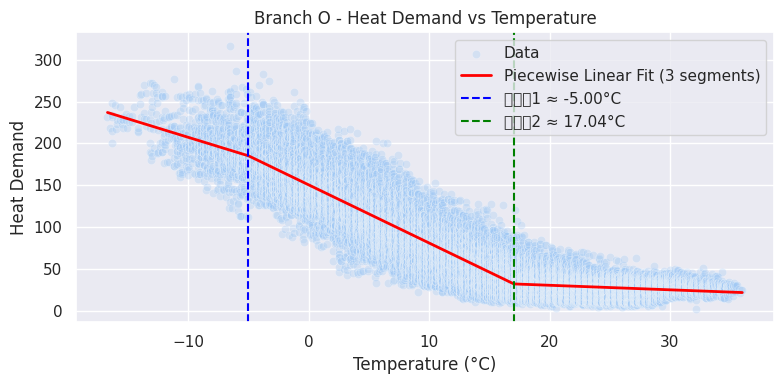

📌 Branch O 추세 변화 지점:
 - 변화점 1 (x0): -5.00 °C
 - 변화점 2 (x1): 17.04 °C



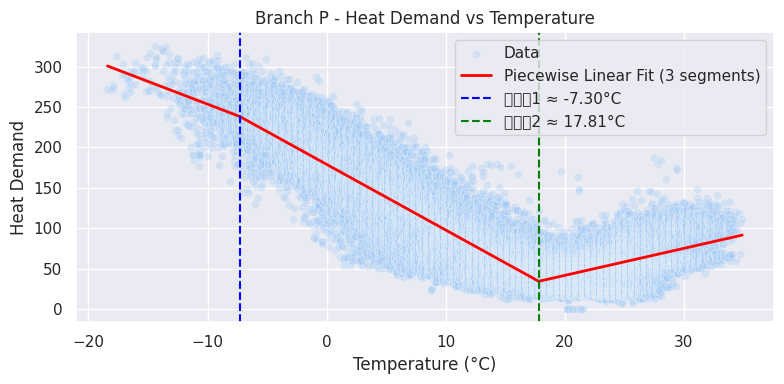

📌 Branch P 추세 변화 지점:
 - 변화점 1 (x0): -7.30 °C
 - 변화점 2 (x1): 17.81 °C



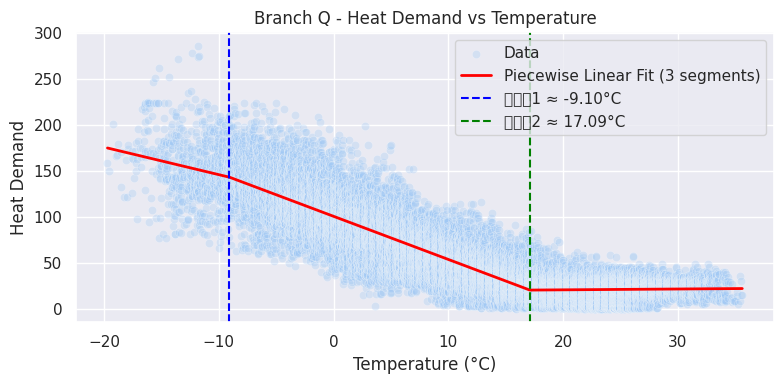

📌 Branch Q 추세 변화 지점:
 - 변화점 1 (x0): -9.10 °C
 - 변화점 2 (x1): 17.09 °C



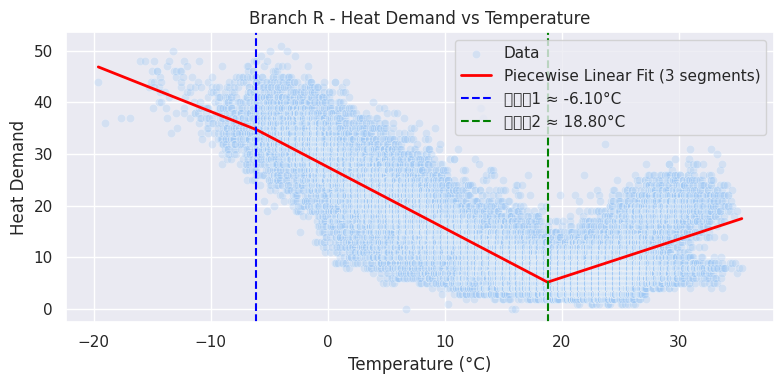

📌 Branch R 추세 변화 지점:
 - 변화점 1 (x0): -6.10 °C
 - 변화점 2 (x1): 18.80 °C



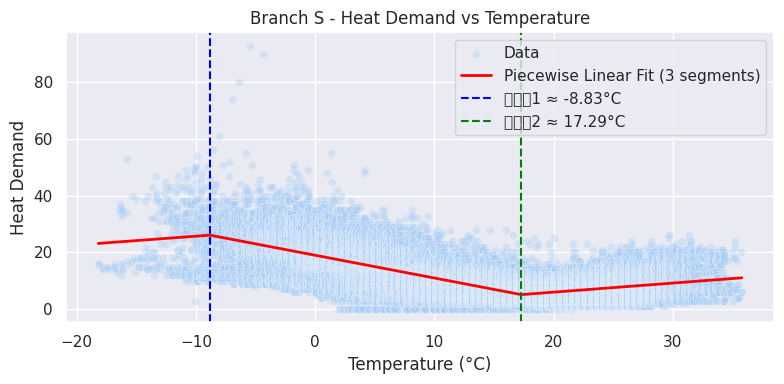

📌 Branch S 추세 변화 지점:
 - 변화점 1 (x0): -8.83 °C
 - 변화점 2 (x1): 17.29 °C

📊 브랜치별 추세 변화 지점 요약:
 - Branch A: x0 ≈ -4.60°C, x1 ≈ 16.51°C
 - Branch B: x0 ≈ -7.52°C, x1 ≈ 16.92°C
 - Branch C: x0 ≈ -4.19°C, x1 ≈ 18.07°C
 - Branch D: x0 ≈ -4.13°C, x1 ≈ 14.22°C
 - Branch E: x0 ≈ 10.86°C, x1 ≈ 23.04°C
 - Branch F: x0 ≈ -7.58°C, x1 ≈ 13.99°C
 - Branch G: x0 ≈ -7.50°C, x1 ≈ 17.02°C
 - Branch H: x0 ≈ -5.72°C, x1 ≈ 16.38°C
 - Branch I: x0 ≈ -6.26°C, x1 ≈ 15.77°C
 - Branch J: x0 ≈ 13.76°C, x1 ≈ 21.94°C
 - Branch K: x0 ≈ -4.70°C, x1 ≈ 17.85°C
 - Branch L: x0 ≈ -0.70°C, x1 ≈ 17.96°C
 - Branch M: x0 ≈ -0.30°C, x1 ≈ 18.05°C
 - Branch N: x0 ≈ -2.58°C, x1 ≈ 17.37°C
 - Branch O: x0 ≈ -5.00°C, x1 ≈ 17.04°C
 - Branch P: x0 ≈ -7.30°C, x1 ≈ 17.81°C
 - Branch Q: x0 ≈ -9.10°C, x1 ≈ 17.09°C
 - Branch R: x0 ≈ -6.10°C, x1 ≈ 18.80°C
 - Branch S: x0 ≈ -8.83°C, x1 ≈ 17.29°C


In [23]:
from scipy.optimize import curve_fit

# 분석할 브랜치 리스트
branches = df_filled.branch_id.unique()

# 3-piece piecewise 선형 함수 정의
def piecewise_linear_3(x, x0, x1, k1, b1, k2, k3):
    cond1 = x < x0
    cond2 = (x >= x0) & (x < x1)
    cond3 = x >= x1

    y = np.zeros_like(x)
    y[cond1] = k1 * x[cond1] + b1
    y[cond2] = k2 * x[cond2] + (k1 * x0 + b1 - k2 * x0)  # 연속성 유지
    y[cond3] = k3 * x[cond3] + (k2 * x1 + (k1 * x0 + b1 - k2 * x0) - k3 * x1)
    return y

# 초기 추정값
p0 = [0, 10, -10, 300, -5, -1]

# 결과 저장 딕셔너리
breakpoints = {}

# 브랜치별 추세 변화점 분석
for branch in branches:
    df_branch = df_filled[df_filled['branch_id'] == branch][['ta', 'heat_demand']].dropna().sort_values(by='ta')
    x = df_branch['ta'].values
    y = df_branch['heat_demand'].values

    try:
        params, _ = curve_fit(piecewise_linear_3, x, y, p0)
        x0, x1, k1, b1, k2, k3 = params
        breakpoints[branch] = (x0, x1)

        # 시각화
        xd = np.linspace(x.min(), x.max(), 500)
        yd = piecewise_linear_3(xd, *params)

        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=x, y=y, alpha=0.3, label='Data')
        plt.plot(xd, yd, color='red', lw=2, label='Piecewise Linear Fit (3 segments)')
        plt.axvline(x=x0, color='blue', linestyle='--', label=f'변화점1 ≈ {x0:.2f}°C')
        plt.axvline(x=x1, color='green', linestyle='--', label=f'변화점2 ≈ {x1:.2f}°C')
        plt.title(f'Branch {branch} - Heat Demand vs Temperature')
        plt.xlabel('Temperature (°C)')
        plt.ylabel('Heat Demand')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        print(f"📌 Branch {branch} 추세 변화 지점:")
        print(f" - 변화점 1 (x0): {x0:.2f} °C")
        print(f" - 변화점 2 (x1): {x1:.2f} °C\n")

    except Exception as e:
        print(f"⚠️ Branch {branch} fitting 실패: {e}")

# 최종 요약
print("📊 브랜치별 추세 변화 지점 요약:")
for branch, (x0, x1) in breakpoints.items():
    print(f" - Branch {branch}: x0 ≈ {x0:.2f}°C, x1 ≈ {x1:.2f}°C")


In [24]:
def assign_ta_zone(row):
    branch = row['branch_id']
    ta = row['ta']

    # 각 브랜치별 변화점(x0, x1)을 기준으로 low, mid, high 구간 분리
    # low: ta < x0, mid: x0 <= ta < x1, high: ta >= x1

    breakpoints = {
        'A': (-4.60, 16.51),
        'B': (-7.52, 16.92),
        'C': (-4.19, 18.07),
        'D': (-4.13, 14.22),
        'E': (10.86, 23.04),
        'F': (-7.58, 13.99),
        'G': (-7.50, 17.02),
        'H': (-5.72, 16.38),
        'I': (-6.26, 15.77),
        'J': (13.76, 21.94),
        'K': (-4.70, 17.85),
        'L': (-0.70, 17.96),
        'M': (-0.30, 18.05),
        'N': (-2.58, 17.37),
        'O': (-5.00, 17.04),
        'P': (-7.30, 17.81),
        'Q': (-9.10, 17.09),
        'R': (-6.10, 18.80),
        'S': (-8.83, 17.29)
    }

    if branch in breakpoints:
        x0, x1 = breakpoints[branch]
        if ta < x0:
            return 'low'
        elif ta < x1:
            return 'mid'
        else:
            return 'high'
    else:
        # 기본값 (예: 분류할 수 없는 브랜치)
        return 'unknown'

# 적용
df_filled['ta_zone'] = df_filled.apply(assign_ta_zone, axis=1)


#### **(11) 누적 일사량 (cumulative_si)**

* 하루 단위 누적

In [25]:
df_filled['cumulative_si'] = df_filled.groupby(['branch_id', 'date'])['si'].cumsum()

## **1-2. 변수 drop**

In [26]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498822 entries, 0 to 498821
Data columns (total 67 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tm              498822 non-null  object 
 1   branch_id       498822 non-null  object 
 2   ta              498822 non-null  float64
 3   wd              498822 non-null  float64
 4   ws              498822 non-null  float64
 5   rn_day          498822 non-null  float64
 6   rn_hr1          498822 non-null  float64
 7   hm              498822 non-null  float64
 8   si              498822 non-null  float64
 9   ta_chi          498822 non-null  float64
 10  heat_demand     498822 non-null  float64
 11  date            498822 non-null  object 
 12  year            498822 non-null  int64  
 13  month           498822 non-null  int64  
 14  day             498822 non-null  int64  
 15  hour            498822 non-null  int64  
 16  quarter         498822 non-null  int64  
 17  day_of_wee

<drop 변수>


* tm: 이미 year, month, day, hour로 분리됨

    -> 모델링할 때 drop

* season: season_group과 중복

* wd: sin, cos 변환한 변수 사용

* quarter, day_of_week: 숫자로 되어 있어 예측에 방해될 것 같음

In [27]:
# 칼럼 drop
df_filled = df_filled.drop(columns=['season', 'wd', 'quarter', 'day_of_week'])


In [28]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498822 entries, 0 to 498821
Data columns (total 63 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tm              498822 non-null  object 
 1   branch_id       498822 non-null  object 
 2   ta              498822 non-null  float64
 3   ws              498822 non-null  float64
 4   rn_day          498822 non-null  float64
 5   rn_hr1          498822 non-null  float64
 6   hm              498822 non-null  float64
 7   si              498822 non-null  float64
 8   ta_chi          498822 non-null  float64
 9   heat_demand     498822 non-null  float64
 10  date            498822 non-null  object 
 11  year            498822 non-null  int64  
 12  month           498822 non-null  int64  
 13  day             498822 non-null  int64  
 14  hour            498822 non-null  int64  
 15  is_weekend      498822 non-null  object 
 16  hour_group      498822 non-null  int64  
 17  ta_lag1   

<다중공산성 검사>

* 보통 VIF 값이 5 이상이면 다중공선성 의심, 10 이상이면 강한 다중공선성으

In [ ]:
'''from statsmodels.stats.outliers_influence import variance_inflation_factor

# 수치형 변수만 선택 (타깃 변수 heat_demand는 제외)
features = df_filled.select_dtypes(include=['float64', 'int64']).drop(columns=['heat_demand'])

# VIF 계산
vif_data = pd.DataFrame()
vif_data['feature'] = features.columns
vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

# VIF가 5 이상인 변수만 출력
high_vif = vif_data[vif_data['VIF'] >= 5].sort_values(by='VIF', ascending=False)
print(high_vif)'''


"from statsmodels.stats.outliers_influence import variance_inflation_factor\n\n# 수치형 변수만 선택 (타깃 변수 heat_demand는 제외)\nfeatures = df_filled.select_dtypes(include=['float64', 'int64']).drop(columns=['heat_demand'])\n\n# VIF 계산\nvif_data = pd.DataFrame()\nvif_data['feature'] = features.columns\nvif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]\n\n# VIF가 5 이상인 변수만 출력\nhigh_vif = vif_data[vif_data['VIF'] >= 5].sort_values(by='VIF', ascending=False)\nprint(high_vif)"

# **2. EDA**

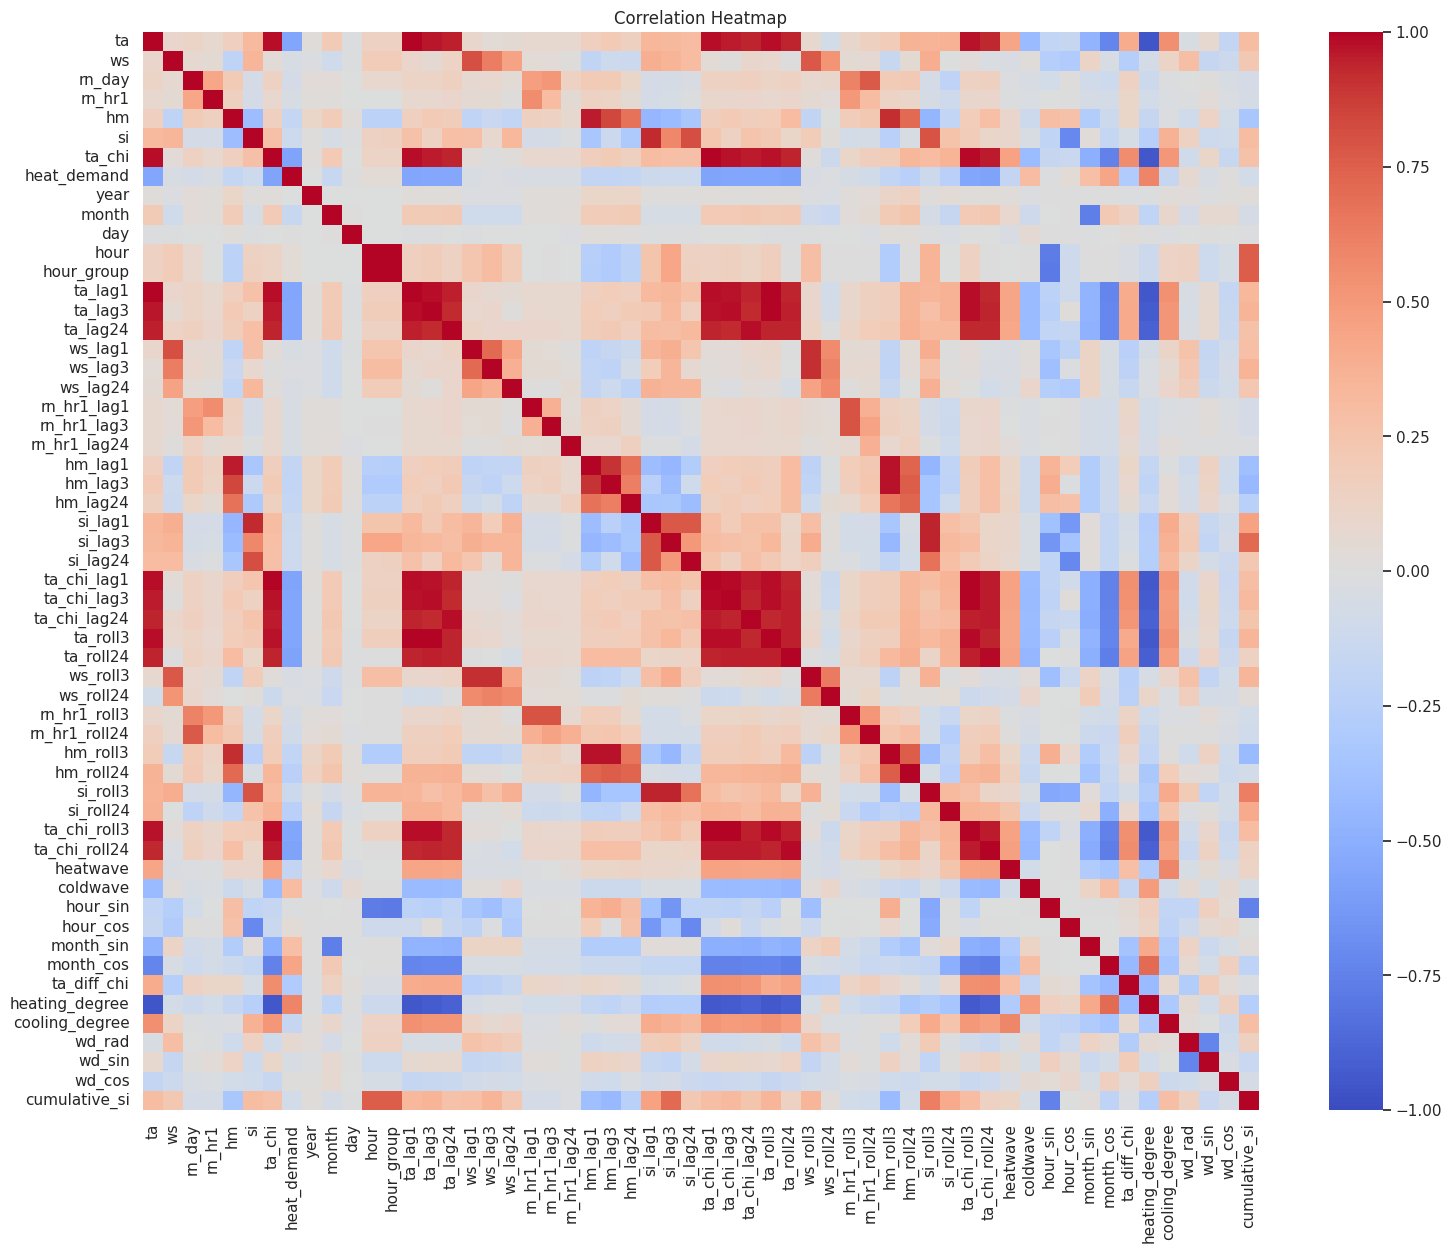

In [ ]:
# heatmap으로 상관관계 시각화
plt.figure(figsize=(18, 14))
numerics = df_filled.select_dtypes(include=['float64', 'int64'])
corr = numerics.corr()

sns.heatmap(corr, cmap='coolwarm', annot=False, center=0, vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# 상관계수 높은 순서대로
top_corr = corr['heat_demand'].sort_values(key=abs, ascending=False)[1:15]
print(top_corr)


heating_degree    0.600345
ta_roll24        -0.575794
ta_chi_roll24    -0.573842
ta_chi           -0.565322
ta_chi_lag1      -0.564593
ta_chi_roll3     -0.562347
ta               -0.560825
ta_lag1          -0.559964
ta_chi_lag24     -0.558610
ta_roll3         -0.557928
ta_chi_lag3      -0.556893
ta_lag24         -0.553287
ta_lag3          -0.551686
month_cos         0.440662
Name: heat_demand, dtype: float64


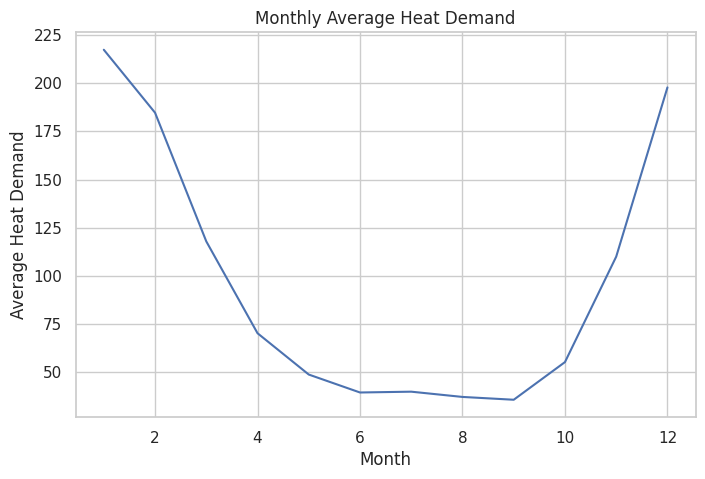

In [ ]:
# 시간 정보가 datetime 형식일 경우
df_filled['tm'] = pd.to_datetime(df_filled['tm'])

# 월별 평균 열수요
monthly_avg = df_filled.groupby('month')['heat_demand'].mean()

plt.figure(figsize=(8, 5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title("Monthly Average Heat Demand")
plt.xlabel("Month")
plt.ylabel("Average Heat Demand")
plt.grid(True)
plt.show()


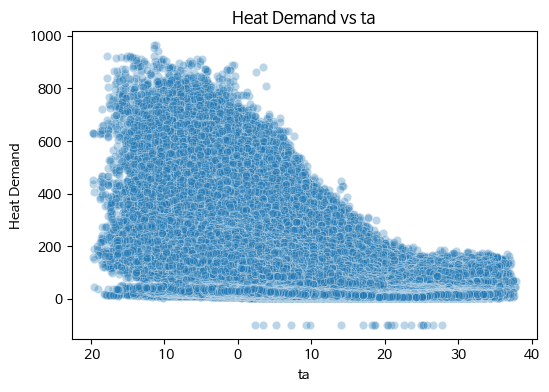

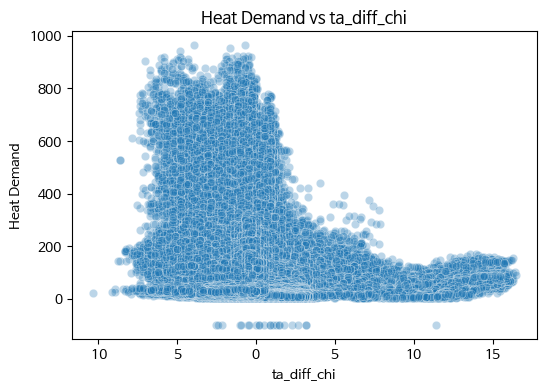

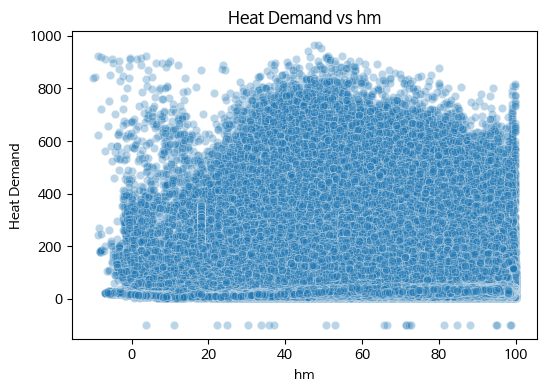

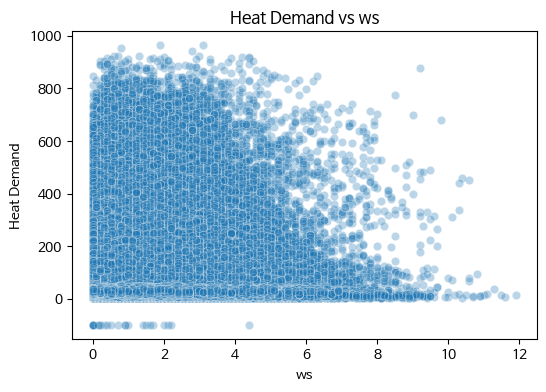

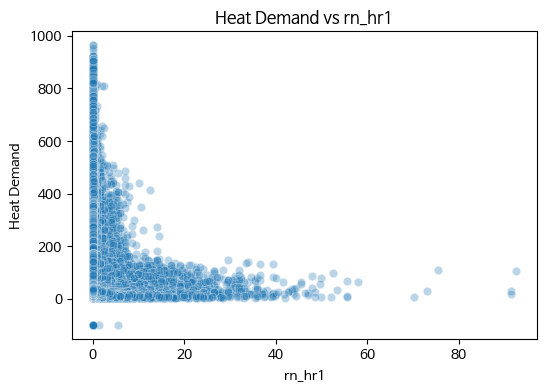

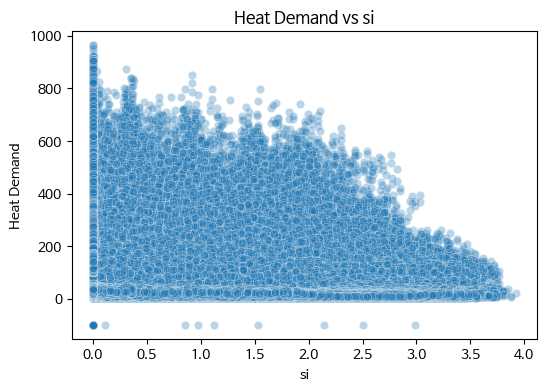

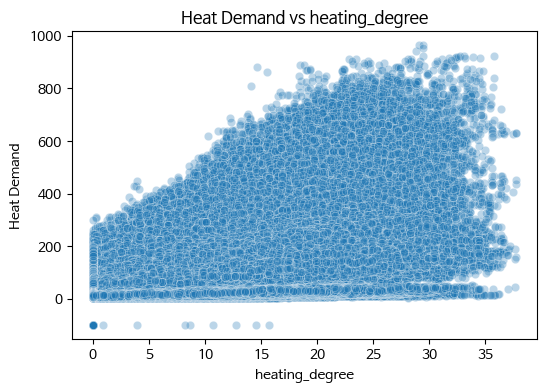

In [ ]:
features_to_plot = ['ta', 'ta_diff_chi', 'hm', 'ws', 'rn_hr1', 'si', 'heating_degree']

for col in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_filled, x=col, y='heat_demand', alpha=0.3)
    plt.title(f'Heat Demand vs {col}')
    plt.xlabel(col)
    plt.ylabel('Heat Demand')
    plt.show()


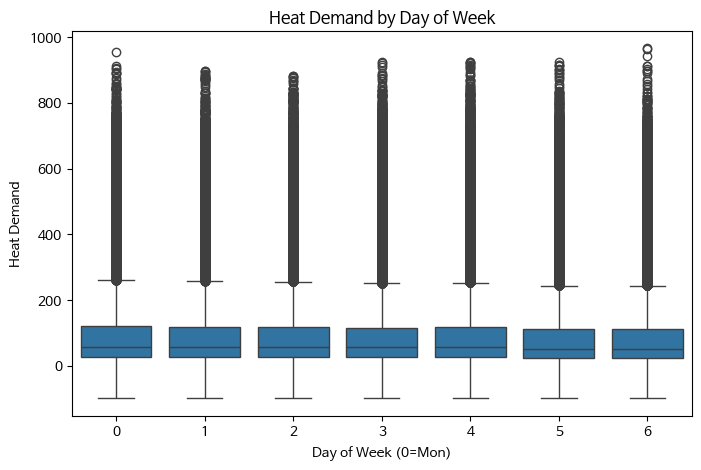

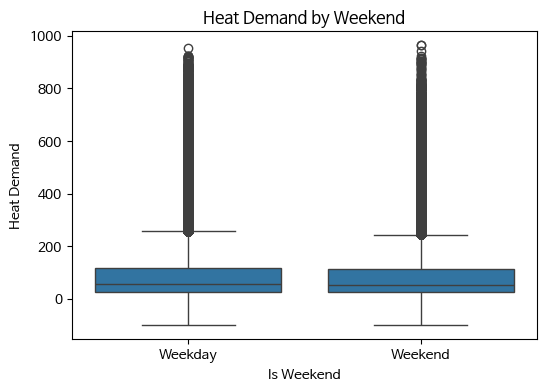

In [ ]:
# 요일별 열수요
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filled, x='day_of_week', y='heat_demand')
plt.title("Heat Demand by Day of Week")
plt.xlabel("Day of Week (0=Mon)")
plt.ylabel("Heat Demand")
plt.show()

# 주말 vs 평일
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_filled, x='is_weekend', y='heat_demand')
plt.title("Heat Demand by Weekend")
plt.xlabel("Is Weekend")
plt.ylabel("Heat Demand")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 기본 설정
sns.set(style="whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 6)

# 연속형 변수 추출
num_cols = df_filled.select_dtypes(include=['float64', 'int64']).columns.drop('heat_demand')

# 범주형 변수 추출
cat_cols = df_filled.select_dtypes(include='object').columns


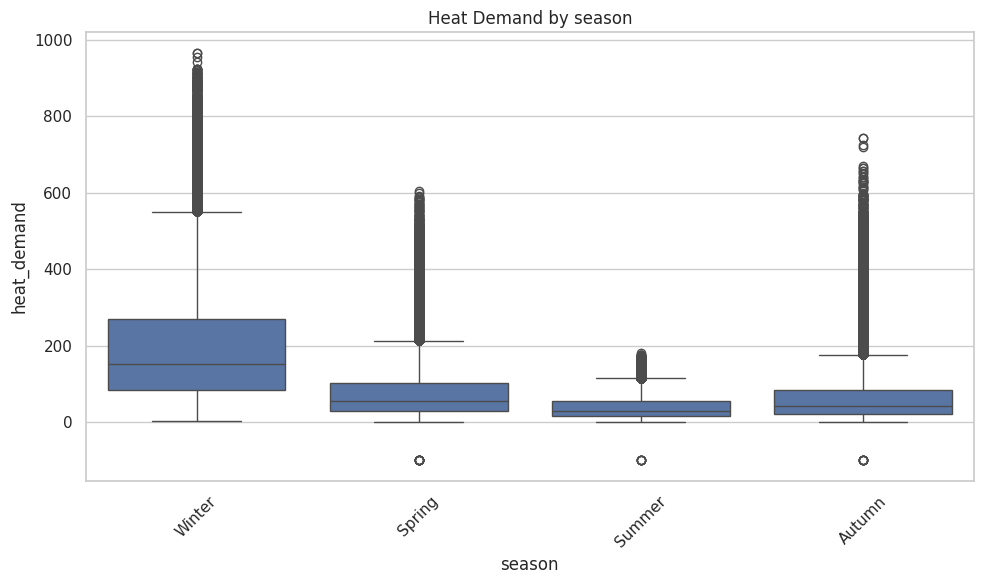

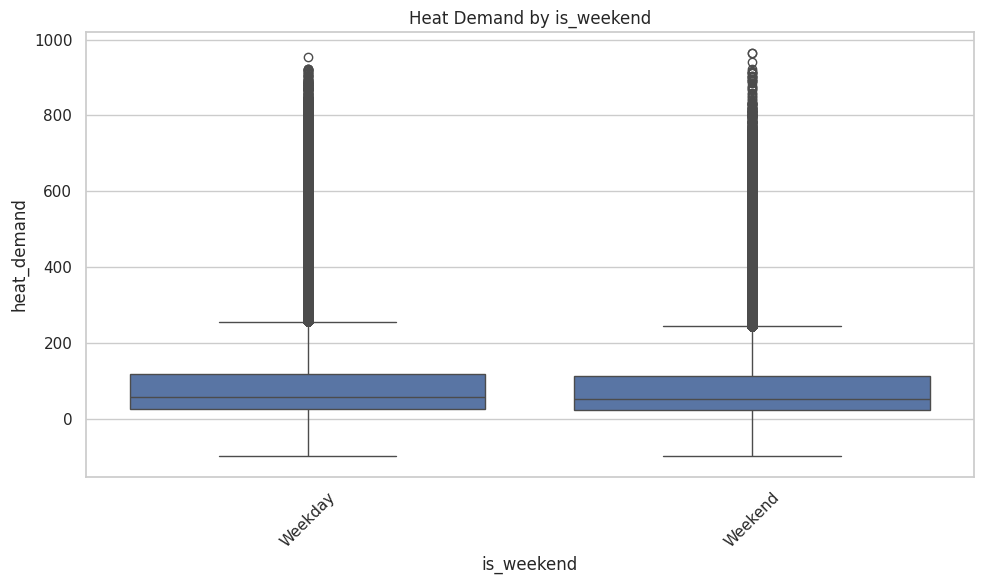

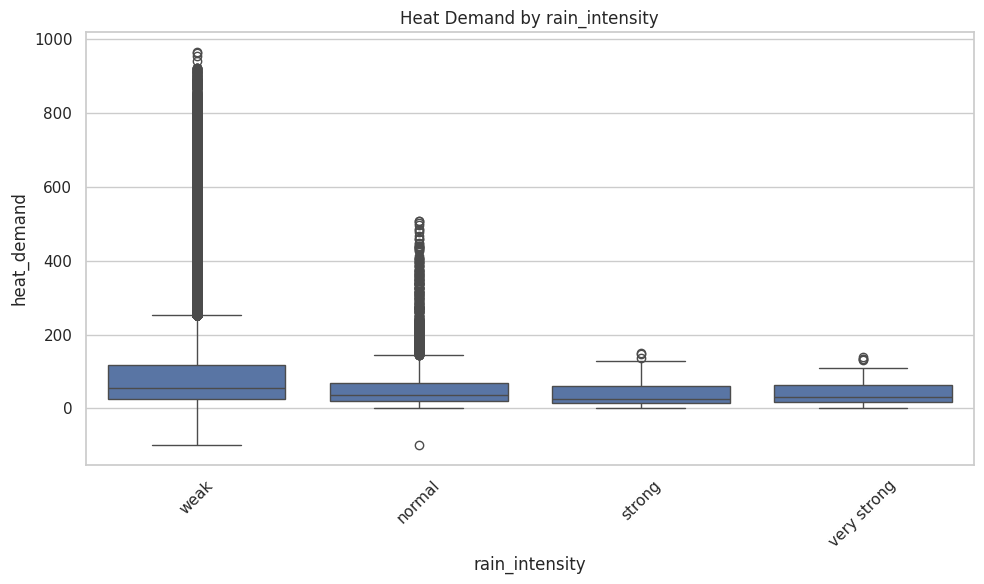

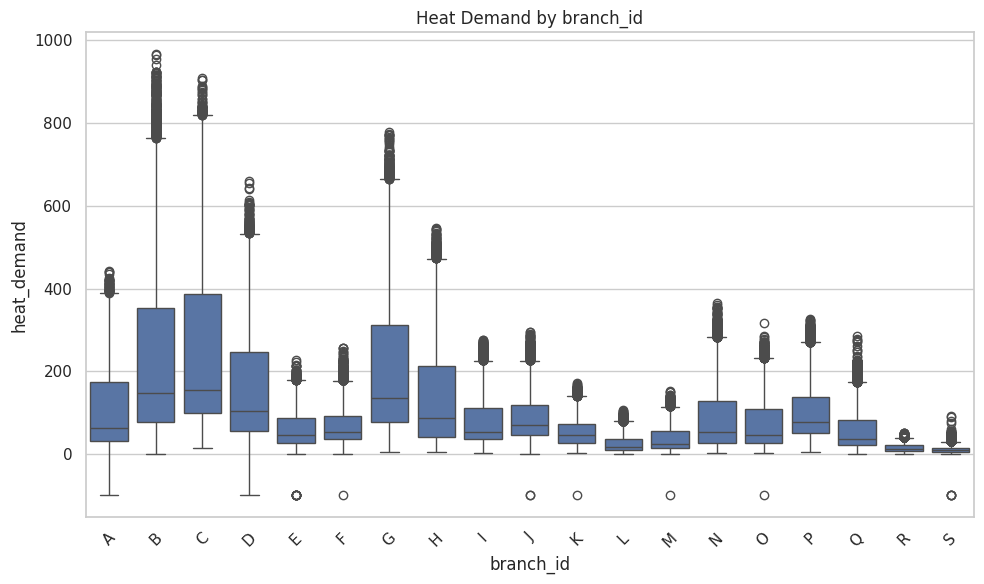

In [ ]:
# ---------------------------
# 5. 범주형 변수 vs 타겟 boxplot
# ---------------------------
for col in ['season', 'is_weekend', 'rain_intensity', 'branch_id']:
    plt.figure()
    sns.boxplot(x=col, y='heat_demand', data=df_filled)
    plt.title(f'Heat Demand by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# **3. 모델링**

In [33]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 17.1 MB/s eta 0:00:00


In [35]:
from sklearn.model_selection import TimeSeriesSplit, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pprint import pprint
import optuna

import warnings
warnings.filterwarnings("ignore")

In [36]:
# 클러스터 정의
cluster_0 = ['E', 'F', 'I', 'J', 'K', 'N', 'O', 'Q']
cluster_1 = ['B', 'C', 'G']
cluster_2 = ['A', 'D', 'H', 'P']
cluster_3 = ['L', 'M', 'R', 'S']

# 클러스터별 데이터프레임 생성
df_cluster_0 = df_filled[df_filled['branch_id'].isin(cluster_0)].copy()
df_cluster_1 = df_filled[df_filled['branch_id'].isin(cluster_1)].copy()
df_cluster_2 = df_filled[df_filled['branch_id'].isin(cluster_2)].copy()
df_cluster_3 = df_filled[df_filled['branch_id'].isin(cluster_3)].copy()

clusters = {
    "cluster_0": df_cluster_0.copy(),
    "cluster_1": df_cluster_1.copy(),
    "cluster_2": df_cluster_2.copy(),
    "cluster_3": df_cluster_3.copy(),
}

## **3-1. XGBoost**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# 클러스터 목록
clusters = [df_cluster_0, df_cluster_1, df_cluster_2, df_cluster_3]

# 결과 저장용 리스트
results = []

for i, df_cluster in enumerate(clusters):
    print(f"\n===== Cluster {i} =====")

    # 로그 타겟 추가
    df_cluster = df_cluster.copy()
    df_cluster['log_heat_demand'] = np.log1p(df_cluster['heat_demand'])

    # 타겟 설정
    y = df_cluster['log_heat_demand']

    # 제거할 컬럼
    drop_cols = ['heat_demand', 'log_heat_demand', 'tm', 'date']
    X = df_cluster.drop(columns=drop_cols)

    # 수치형, 범주형 구분
    num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = X.select_dtypes(include=['object']).columns.tolist()

    # 전처리기
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
        ])

    # 데이터 분할
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42)

    # 파이프라인
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor(
            objective='reg:squarederror',
            n_estimators=100,
            learning_rate=0.1,
            max_depth=6,
            random_state=42,
            n_jobs=-1
        ))
    ])

    # 학습
    model.fit(X_train, y_train)

    # 예측
    y_pred_log = model.predict(X_val)
    y_pred = np.expm1(y_pred_log)  # 로그 역변환
    y_true = np.expm1(y_val)       # 실제값도 역변환

    # 성능 지표
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)


    print(f"RMSE: {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"R²  : {r2:.4f}")

    results.append({'Cluster': i, 'RMSE': rmse, 'MAE': mae, 'R2': r2})

# 결과 데이터프레임
results_df = pd.DataFrame(results)
print("\n=== 성능 요약 ===")
print(results_df)



===== Cluster 0 =====
RMSE: 9.80
MAE : 6.93
R²  : 0.9658

===== Cluster 1 =====
RMSE: 25.61
MAE : 17.23
R²  : 0.9804

===== Cluster 2 =====
RMSE: 16.77
MAE : 11.50
R²  : 0.9751

===== Cluster 3 =====
RMSE: 3.42
MAE : 2.23
R²  : 0.9732

=== 성능 요약 ===
   Cluster       RMSE        MAE        R2
0        0   9.804387   6.928409  0.965752
1        1  25.611840  17.227999  0.980412
2        2  16.766891  11.501801  0.975099
3        3   3.423071   2.233763  0.973183


* **파라미터 튜닝, 시계열 분리 X**

In [ ]:
# 클러스터별 데이터프레임 딕셔너리
clusters = {
    "cluster_0": df_cluster_0.copy(),
    "cluster_1": df_cluster_1.copy(),
    "cluster_2": df_cluster_2.copy(),
    "cluster_3": df_cluster_3.copy(),
}

results = {}

for name, df in clusters.items():
    print(f"\n▶ {name} 클러스터 모델 튜닝 중...")

    df['log_heat_demand'] = np.log1p(df['heat_demand'])
    y = df['log_heat_demand']
    drop_cols = ['heat_demand', 'log_heat_demand', 'tm', 'date']
    X = df.drop(columns=drop_cols)

    num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = X.select_dtypes(include=['object']).columns.tolist()

    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
    ])

    param_grid = {
        'regressor__n_estimators': [100, 200],
        'regressor__max_depth': [4, 6],
        'regressor__learning_rate': [0.05, 0.1]
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred_log = best_model.predict(X_val)
    y_pred = np.expm1(y_pred_log)  # 로그 역변환
    y_true = np.expm1(y_val)       # 실제값도 역변환

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    results[name] = {
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "BestParams": grid_search.best_params_
    }

# 최종 결과 확인
from pprint import pprint
pprint(results)



▶ cluster_0 클러스터 모델 튜닝 중...

▶ cluster_1 클러스터 모델 튜닝 중...

▶ cluster_2 클러스터 모델 튜닝 중...

▶ cluster_3 클러스터 모델 튜닝 중...
{'cluster_0': {'BestParams': {'regressor__learning_rate': 0.1,
                              'regressor__max_depth': 6,
                              'regressor__n_estimators': 200},
               'MAE': 6.1995038875584285,
               'R2': 0.9723542255639771,
               'RMSE': np.float64(8.708621444649328)},
 'cluster_1': {'BestParams': {'regressor__learning_rate': 0.1,
                              'regressor__max_depth': 6,
                              'regressor__n_estimators': 200},
               'MAE': 15.115598958764373,
               'R2': 0.9855427159145607,
               'RMSE': np.float64(21.987939843678554)},
 'cluster_2': {'BestParams': {'regressor__learning_rate': 0.1,
                              'regressor__max_depth': 6,
                              'regressor__n_estimators': 200},
               'MAE': 10.249599207698493,
               '

* **파라미터 튜닝, 시계열 분리 O**

In [ ]:
# 클러스터별 데이터프레임 딕셔너리
clusters = {
    "cluster_0": df_cluster_0.copy(),
    "cluster_1": df_cluster_1.copy(),
    "cluster_2": df_cluster_2.copy(),
    "cluster_3": df_cluster_3.copy(),
}

results_xgb = {}

for name, df in clusters.items():
    print(f"\n▶ {name} 클러스터 모델 튜닝 중...")

    # 시계열 정렬
    df = df.sort_values(by=['branch_id', 'tm'])

    # 시계열 train/val 분할
    df['tm'] = pd.to_datetime(df['tm'])
    df['log_heat_demand'] = np.log1p(df['heat_demand'])

    train_df = df[df['tm'] < '2023-01-01']
    val_df = df[df['tm'] >= '2023-01-01']

    y_train = train_df['log_heat_demand']
    y_val = val_df['log_heat_demand']

    drop_cols = ['heat_demand', 'log_heat_demand', 'tm', 'date']
    X_train = train_df.drop(columns=drop_cols)
    X_val = val_df.drop(columns=drop_cols)

    num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
    ])

    param_grid = {
        'regressor__n_estimators': [100, 200],
        'regressor__max_depth': [4, 6],
        'regressor__learning_rate': [0.05, 0.1]
    }

    # TimeSeriesSplit 설정 (train 내에서 교차검증)
    tscv = TimeSeriesSplit(n_splits=3)

    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=tscv,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred_log = best_model.predict(X_val)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_val)

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    results_xgb[name] = {
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "BestParams": grid_search.best_params_
    }

# 최종 결과 확인
pprint(results_xgb)



▶ cluster_0 클러스터 모델 튜닝 중...

▶ cluster_1 클러스터 모델 튜닝 중...

▶ cluster_2 클러스터 모델 튜닝 중...

▶ cluster_3 클러스터 모델 튜닝 중...
{'cluster_0': {'BestParams': {'regressor__learning_rate': 0.1,
                              'regressor__max_depth': 6,
                              'regressor__n_estimators': 200},
               'MAE': 8.26942499880122,
               'R2': 0.9488126430195138,
               'RMSE': np.float64(11.484277916143437)},
 'cluster_1': {'BestParams': {'regressor__learning_rate': 0.1,
                              'regressor__max_depth': 4,
                              'regressor__n_estimators': 200},
               'MAE': 24.32151807693586,
               'R2': 0.9599141172622636,
               'RMSE': np.float64(34.82293428382798)},
 'cluster_2': {'BestParams': {'regressor__learning_rate': 0.1,
                              'regressor__max_depth': 4,
                              'regressor__n_estimators': 200},
               'MAE': 16.24791664267034,
               'R2':

* **Sliding Window, 시계열 분리 O**

* Sliding window 방식은 시계열 예측에서 시간의 흐름에 따라 학습과 평가를 반복하는 전략

    * 모델을 한 번만 학습하고 평가하는 대신, 과거 데이터를 일정 구간 단위로 이동하며 여러 번 학습과 예측을 수행해 더 신뢰성 있는 검증을 할 수 있음

* 전체 데이터: 2021-01-01 ~ 2023-12-31

* 윈도우 크기 (훈련기간): 1년

* 검증기간: 3개월

* 슬라이드 간격: 3개월


| 반복  | 학습 기간            | 검증 기간            |
| --- | ---------------- | ---------------- |
| 1   | ’21-01 \~ ’21-12 | ’22-01 \~ ’22-03 |
| 2   | ’21-04 \~ ’22-03 | ’22-04 \~ ’22-06 |
| 3   | ’21-07 \~ ’22-06 | ’22-07 \~ ’22-09 |
| ... | ...              | ...              |


In [ ]:
window_results_xgb = {}

# Sliding window 파라미터
train_period = pd.DateOffset(years=1)
val_period = pd.DateOffset(months=3)
slide_step = pd.DateOffset(months=3)

for name, df in clusters.items():
    print(f"\n▶ {name} 클러스터 - XGBoost 슬라이딩 윈도우 검증 중...")

    df = df.copy()
    df['log_heat_demand'] = np.log1p(df['heat_demand'])
    df['tm'] = pd.to_datetime(df['tm'])
    df = df.sort_values(['branch_id', 'tm']).reset_index(drop=True)

    drop_cols = ['heat_demand', 'log_heat_demand', 'date']
    X_all = df.drop(columns=drop_cols)
    y_all = df['log_heat_demand']

    num_cols = X_all.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = X_all.select_dtypes(include=['object']).columns.tolist()

    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1))
    ])

    start_time = pd.to_datetime("2022-01-01")
    rmse_list, mae_list, r2_list = [], [], []

    while start_time + train_period + val_period <= pd.to_datetime("2023-12-31"):
        train_end = start_time + train_period
        val_end = train_end + val_period

        train_mask = (df['tm'] >= start_time) & (df['tm'] < train_end)
        val_mask = (df['tm'] >= train_end) & (df['tm'] < val_end)

        if train_mask.sum() == 0 or val_mask.sum() == 0:
            break

        X_train = X_all[train_mask]
        y_train = y_all[train_mask]
        X_val = X_all[val_mask]
        y_val = y_all[val_mask]

        pipeline.fit(X_train, y_train)
        y_pred_log = pipeline.predict(X_val)
        y_pred = np.expm1(y_pred_log)
        y_true = np.expm1(y_val)

        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_list.append(r2)

        start_time += slide_step

    window_results_xgb[name] = {
        "Avg_RMSE": np.mean(rmse_list),
        "Avg_MAE": np.mean(mae_list),
        "Avg_R2": np.mean(r2_list),
        "n_windows": len(rmse_list)
    }

# 최종 결과 출력
pprint(window_results_xgb)



▶ cluster_0 클러스터 - XGBoost 슬라이딩 윈도우 검증 중...

▶ cluster_1 클러스터 - XGBoost 슬라이딩 윈도우 검증 중...

▶ cluster_2 클러스터 - XGBoost 슬라이딩 윈도우 검증 중...

▶ cluster_3 클러스터 - XGBoost 슬라이딩 윈도우 검증 중...
{'cluster_0': {'Avg_MAE': np.float64(8.756989467208518),
               'Avg_R2': np.float64(0.8480094968556463),
               'Avg_RMSE': np.float64(12.112231152039143),
               'n_windows': 3},
 'cluster_1': {'Avg_MAE': np.float64(23.898730617039476),
               'Avg_R2': np.float64(0.7958158023059622),
               'Avg_RMSE': np.float64(30.64925856032868),
               'n_windows': 3},
 'cluster_2': {'Avg_MAE': np.float64(14.8981488612537),
               'Avg_R2': np.float64(0.7821825144493433),
               'Avg_RMSE': np.float64(19.840047261867667),
               'n_windows': 3},
 'cluster_3': {'Avg_MAE': np.float64(3.13696372017793),
               'Avg_R2': np.float64(0.8062591324227801),
               'Avg_RMSE': np.float64(4.233193584821155),
               'n_windows': 3}}


* **변수 제거**

In [ ]:
results_xgb_2 = {}

for name, df in clusters.items():
    print(f"\n▶ {name} 클러스터 모델 튜닝 중...")

    # 시계열 정렬
    df = df.sort_values(by=['branch_id', 'tm'])

    # 시계열 train/val 분할
    df['tm'] = pd.to_datetime(df['tm'])
    df['log_heat_demand'] = np.log1p(df['heat_demand'])

    train_df = df[df['tm'] < '2023-01-01']
    val_df = df[df['tm'] >= '2023-01-01']

    y_train = train_df['log_heat_demand']
    y_val = val_df['log_heat_demand']

    drop_cols = ['heat_demand', 'log_heat_demand', 'tm', 'date']
    X_train = train_df.drop(columns=drop_cols)
    X_val = val_df.drop(columns=drop_cols)

    # 수치형, 범주형 분리
    num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

    # 기본 전처리 파이프라인
    preprocessor_full = ColumnTransformer([
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

    # 원시 모델로 피처 중요도 확인
    xgb_base = Pipeline(steps=[
        ('preprocessor', preprocessor_full),
        ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
    ])
    xgb_base.fit(X_train, y_train)

    # 피처 이름 가져오기
    ohe = xgb_base.named_steps['preprocessor'].named_transformers_['cat']
    ohe_feature_names = ohe.get_feature_names_out(cat_cols)
    all_feature_names = num_cols + list(ohe_feature_names)

    # 중요도 순위로 상위 30개 선택
    importances = xgb_base.named_steps['regressor'].feature_importances_
    top_indices = np.argsort(importances)[::-1][:30]
    top_features = [all_feature_names[i] for i in top_indices]

    print(f"▶ {name} 상위 30개 중요 변수: {top_features[:5]} ...")

    # 전처리 (상위 30개만 추출한 전처기)
    preprocessor_top = ColumnTransformer([
        ('num', StandardScaler(), [col for col in num_cols if col in top_features]),
        ('cat', OneHotEncoder(handle_unknown='ignore'), [col for col in cat_cols if any(col in f for f in top_features)])
    ])

    # 파이프라인 및 그리드 서치
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor_top),
        ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
    ])

    param_grid = {
        'regressor__n_estimators': [100, 200],
        'regressor__max_depth': [4, 6],
        'regressor__learning_rate': [0.05, 0.1]
    }

    tscv = TimeSeriesSplit(n_splits=3)

    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=tscv,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred_log = best_model.predict(X_val)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_val)

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    results_xgb_2[name] = {
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "BestParams": grid_search.best_params_,
        "TopFeatures": top_features
    }

# 결과 출력
pprint(results_xgb_2)



▶ cluster_0 클러스터 모델 튜닝 중...
▶ cluster_0 상위 30개 중요 변수: ['season_group_winter', 'ta_chi_roll24', 'ta_chi', 'hour', 'branch_id_Q'] ...

▶ cluster_1 클러스터 모델 튜닝 중...
▶ cluster_1 상위 30개 중요 변수: ['season_group_winter', 'ta_chi_roll24', 'season_group_summer', 'ta_chi_lag1', 'ta_chi'] ...

▶ cluster_2 클러스터 모델 튜닝 중...
▶ cluster_2 상위 30개 중요 변수: ['season_group_winter', 'ta_chi_roll24', 'season_group_summer', 'branch_id_P', 'ta_chi'] ...

▶ cluster_3 클러스터 모델 튜닝 중...
▶ cluster_3 상위 30개 중요 변수: ['branch_id_S', 'season_group_winter', 'ta_chi', 'branch_id_R', 'branch_id_M'] ...
{'cluster_0': {'BestParams': {'regressor__learning_rate': 0.1,
                              'regressor__max_depth': 6,
                              'regressor__n_estimators': 200},
               'MAE': 8.320401904936878,
               'R2': 0.9477635967751947,
               'RMSE': np.float64(11.601361875452552),
               'TopFeatures': ['season_group_winter',
                               'ta_chi_roll24',
           

<Figure size 1000x600 with 0 Axes>

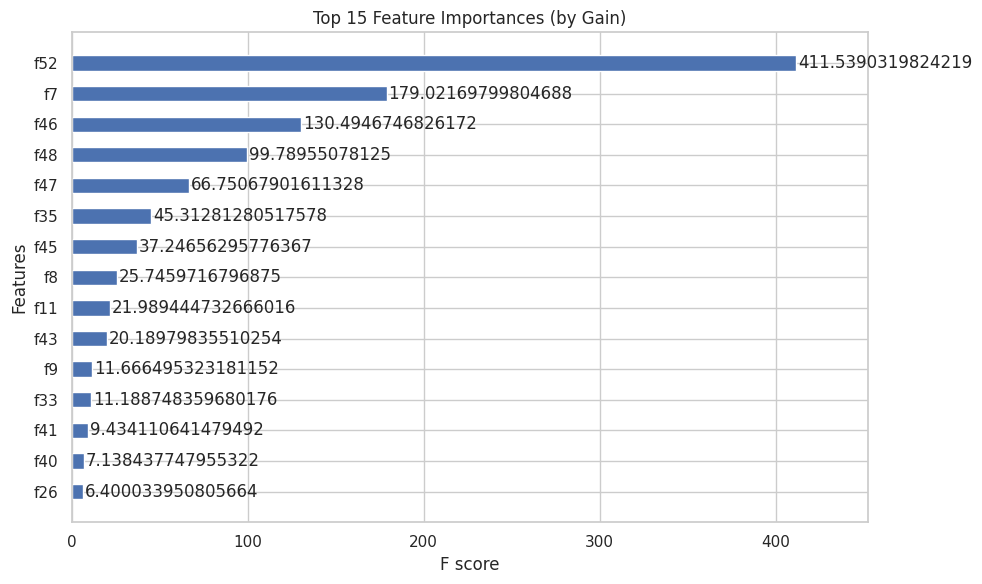

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# 모델 내부 XGBRegressor 추출
xgb_model = best_model.named_steps['regressor']

# 중요도 시각화
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=15, importance_type='gain', height=0.5)
plt.title('Top 15 Feature Importances (by Gain)')
plt.tight_layout()
plt.show()



=== cluster_0 heat_demand 통계량 ===
count    210202.000000
mean         69.153291
std          52.677003
min           0.000000
25%          29.000000
50%          52.000000
75%          96.000000
max         365.000000
Name: heat_demand, dtype: float64


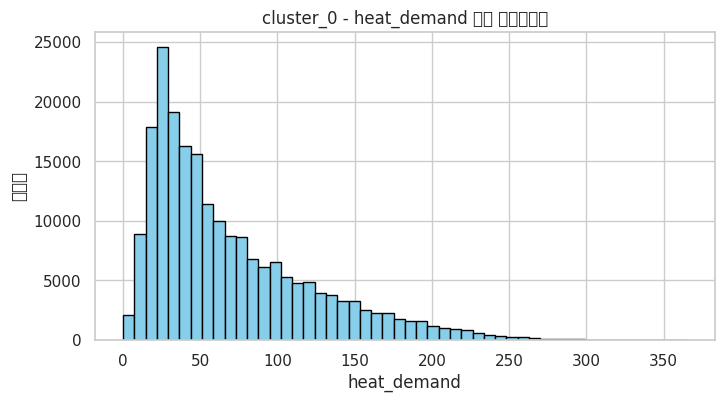


=== cluster_1 heat_demand 통계량 ===
count    78831.000000
mean       227.155294
std        183.932874
min          1.000000
25%         83.000000
50%        147.000000
75%        348.000000
max        966.000000
Name: heat_demand, dtype: float64


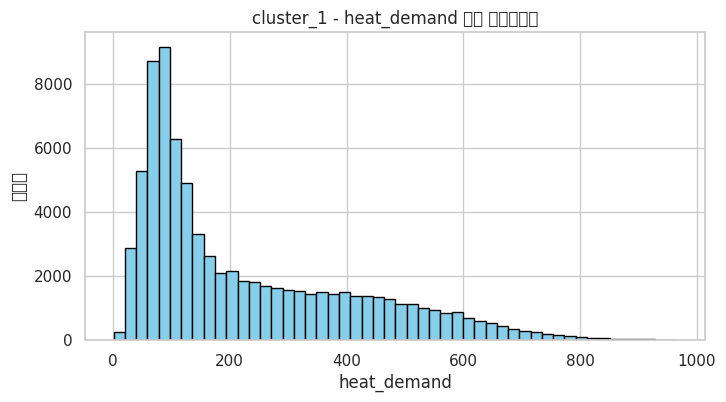


=== cluster_2 heat_demand 통계량 ===
count    105104.000000
mean        124.722237
std         105.292428
min           0.000000
25%          44.000000
50%          83.000000
75%         185.000000
max         659.000000
Name: heat_demand, dtype: float64


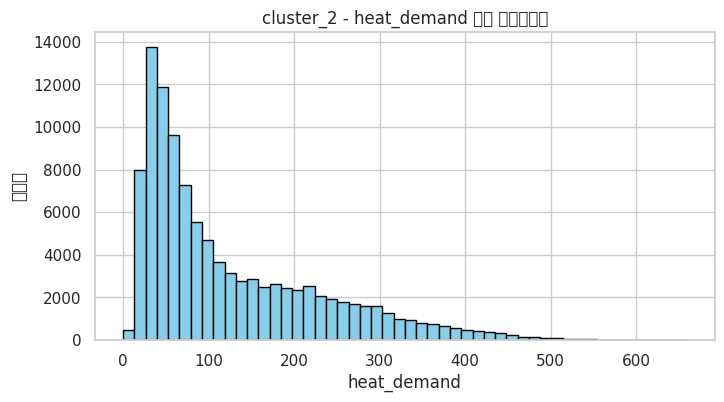


=== cluster_3 heat_demand 통계량 ===
count    105103.000000
mean         21.930478
std          20.610710
min           0.000000
25%           8.000000
50%          14.000000
75%          27.000000
max         152.000000
Name: heat_demand, dtype: float64


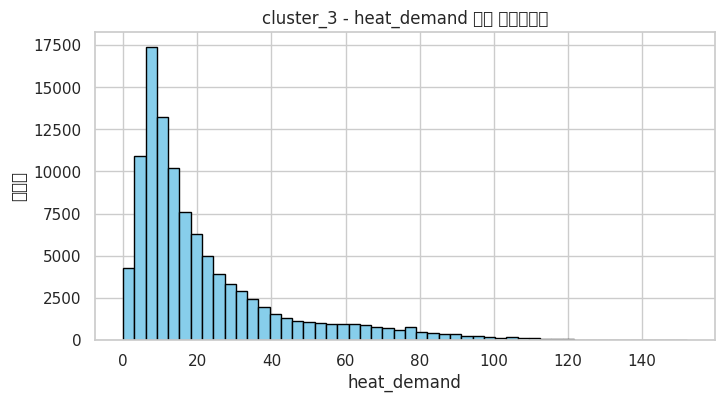

In [ ]:
import matplotlib.pyplot as plt

clusters = {
    "cluster_0": df_cluster_0,
    "cluster_1": df_cluster_1,
    "cluster_2": df_cluster_2,
    "cluster_3": df_cluster_3,
}

for name, df in clusters.items():
    print(f"\n=== {name} heat_demand 통계량 ===")
    desc = df['heat_demand'].describe()
    print(desc)

    plt.figure(figsize=(8, 4))
    plt.hist(df['heat_demand'], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'{name} - heat_demand 분포 히스토그램')
    plt.xlabel('heat_demand')
    plt.ylabel('빈도수')
    plt.grid(True)
    plt.show()



RMSE는 절대 오차 크기를 반영하는 지표라서 타겟 값의 크기와 분포에 민감합니다.

예를 들어, 클러스터별 heat_demand 값의 평균이나 분산이 크게 다르면 RMSE도 달라질 수밖에 없습니다.

즉, 클러스터별 타겟 값의 범위가 클수록 RMSE가 높게 나올 가능성이 큽니다.

## **3-2. RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# 클러스터별 데이터프레임 딕셔너리
clusters = {
    "cluster_0": df_cluster_0.copy(),
    "cluster_1": df_cluster_1.copy(),
    "cluster_2": df_cluster_2.copy(),
    "cluster_3": df_cluster_3.copy(),
}

results_rf = {}

for name, df in clusters.items():
    print(f"\n▶ {name} 클러스터 모델 튜닝 중...")

    # 날짜형 변환 및 정렬
    df['tm'] = pd.to_datetime(df['tm'])
    df = df.sort_values(by=['branch_id', 'tm'])

    # 로그 타깃 생성
    df['log_heat_demand'] = np.log1p(df['heat_demand'])

    # 시계열 기반 train/val 분할
    train_df = df[df['tm'] < '2023-01-01']
    val_df = df[df['tm'] >= '2023-01-01']

    y_train = train_df['log_heat_demand']
    y_val = val_df['log_heat_demand']

    drop_cols = ['heat_demand', 'log_heat_demand', 'tm', 'date']
    X_train = train_df.drop(columns=drop_cols)
    X_val = val_df.drop(columns=drop_cols)

    num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ])

    param_grid = {
        'regressor__n_estimators': [100, 200],
        'regressor__max_depth': [None, 10, 20],
        'regressor__min_samples_split': [2, 5]
    }

    # 시간 순서 고려한 교차검증
    tscv = TimeSeriesSplit(n_splits=3)

    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=tscv,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    # 예측 및 역변환
    y_pred_log = best_model.predict(X_val)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_val)

    # 평가 지표 계산
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    results_rf[name] = {
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "BestParams": grid_search.best_params_
    }

# 최종 결과 출력
pprint(results_rf)



▶ cluster_0 클러스터 모델 튜닝 중...


KeyboardInterrupt: 

## **3-3. LGBM**

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
results_lgbm = {}

for name, df in clusters.items():
    print(f"\n▶ {name} 클러스터 LGBM 모델 튜닝 중...")

    df['log_heat_demand'] = np.log1p(df['heat_demand'])
    df = df.sort_values(by=['branch_id', 'tm']).reset_index(drop=True)

    split_date = '2023-01-01'
    train_mask = df['tm'] < split_date
    test_mask = df['tm'] >= split_date

    drop_cols = ['heat_demand', 'log_heat_demand', 'date', 'tm']
    X = df.drop(columns=drop_cols)
    y = df['log_heat_demand']

    X_train, X_val = X[train_mask], X[test_mask]
    y_train, y_val = y[train_mask], y[test_mask]

    num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = X.select_dtypes(include=['object']).columns.tolist()

    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LGBMRegressor(objective='regression', random_state=42))
    ])

    param_grid = {
        'regressor__n_estimators': [100, 200],
        'regressor__max_depth': [4, 8],
        'regressor__learning_rate': [0.05, 0.1]
    }

    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=TimeSeriesSplit(n_splits=3),
        scoring='neg_root_mean_squared_error',
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred_log = best_model.predict(X_val)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_val)

    results_lgbm[name] = {
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred),
        "BestParams": grid_search.best_params_
    }

pprint(results_lgbm)



▶ cluster_0 클러스터 LGBM 모델 튜닝 중...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11111
[LightGBM] [Info] Number of data points in the train set: 139949, number of used features: 76
[LightGBM] [Info] Start training from score 3.972443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

## **3-4. CatBoost**

In [37]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.1 MB/s eta 0:00:00


In [38]:
from catboost import CatBoostRegressor, Pool

In [ ]:
results_catboost = {}

for name, df in clusters.items():
    print(f"\n▶ {name} 클러스터 CatBoost 모델 튜닝 중...")

    df['log_heat_demand'] = np.log1p(df['heat_demand'])
    df = df.sort_values(by=['branch_id', 'tm']).reset_index(drop=True)

    split_date = '2023-01-01'
    train_mask = df['tm'] < split_date
    test_mask = df['tm'] >= split_date

    drop_cols = ['heat_demand', 'log_heat_demand', 'date']
    X = df.drop(columns=drop_cols)
    y = df['log_heat_demand']

    X_train, X_val = X[train_mask], X[test_mask]
    y_train, y_val = y[train_mask], y[test_mask]

    # CatBoost는 문자열 그대로 넣어도 내부에서 자동 처리함
    cat_cols = X.select_dtypes(include=['object']).columns.tolist()

    # GridSearchCV에 넣기 위해 CatBoost 객체 선언
    model = CatBoostRegressor(
        verbose=0,
        random_state=42
    )

    param_grid = {
        'iterations': [500],
        'depth': [4, 6],
        'learning_rate': [0.05, 0.1]
    }

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=TimeSeriesSplit(n_splits=3),
        scoring='neg_root_mean_squared_error',
        n_jobs=-1
    )

    # ✅ cat_features에 열 이름 리스트 직접 전달
    grid_search.fit(X_train, y_train, cat_features=cat_cols)

    best_model = grid_search.best_estimator_

    y_pred_log = best_model.predict(X_val)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_val)

    results_catboost[name] = {
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred),
        "BestParams": grid_search.best_params_
    }

pprint(results_catboost)



▶ cluster_0 클러스터 CatBoost 모델 튜닝 중...

▶ cluster_1 클러스터 CatBoost 모델 튜닝 중...

▶ cluster_2 클러스터 CatBoost 모델 튜닝 중...

▶ cluster_3 클러스터 CatBoost 모델 튜닝 중...
{'cluster_0': {'BestParams': {'depth': 6,
                              'iterations': 500,
                              'learning_rate': 0.05},
               'MAE': 8.592299580778215,
               'R2': 0.9451620532354646,
               'RMSE': np.float64(11.886744660838305)},
 'cluster_1': {'BestParams': {'depth': 4,
                              'iterations': 500,
                              'learning_rate': 0.1},
               'MAE': 25.94613195592959,
               'R2': 0.955546829666907,
               'RMSE': np.float64(36.670852580954154)},
 'cluster_2': {'BestParams': {'depth': 4,
                              'iterations': 500,
                              'learning_rate': 0.1},
               'MAE': 16.39959564361193,
               'R2': 0.9461728103184317,
               'RMSE': np.float64(23.69824532220699)},
 'c

* **optuna 튜닝**

In [ ]:
def optimize_catboost_for_cluster(name, df):
    print(f"\n▶ {name} 클러스터 Optuna 튜닝 중...")

    df['log_heat_demand'] = np.log1p(df['heat_demand'])
    df = df.sort_values(by=['branch_id', 'tm']).reset_index(drop=True)

    split_date = '2023-01-01'
    train_mask = df['tm'] < split_date
    test_mask = df['tm'] >= split_date

    drop_cols = ['heat_demand', 'log_heat_demand', 'date']
    X = df.drop(columns=drop_cols)
    y = df['log_heat_demand']

    X_train, X_val = X[train_mask], X[test_mask]
    y_train, y_val = y[train_mask], y[test_mask]

    cat_cols = X.select_dtypes(include=['object']).columns.tolist()

    def objective(trial):
        params = {
            'iterations': trial.suggest_int('iterations', 300, 1000),
            'depth': trial.suggest_int('depth', 4, 10),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
            'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
            'random_strength': trial.suggest_float('random_strength', 1e-3, 10),
            'loss_function': 'RMSE',
            'verbose': 0,
            'random_state': 42
        }

        tscv = TimeSeriesSplit(n_splits=3)
        rmses = []

        for train_idx, val_idx in tscv.split(X_train):
            X_tr, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_tr, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

            train_pool = Pool(X_tr, y_tr, cat_features=cat_cols)
            val_pool = Pool(X_val_cv, y_val_cv, cat_features=cat_cols)

            model = CatBoostRegressor(**params)
            model.fit(train_pool)
            preds = model.predict(val_pool)
            rmse = np.sqrt(mean_squared_error(y_val_cv, preds))
            rmses.append(rmse)

        return np.mean(rmses)

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=50)

    best_params = study.best_trial.params
    best_params.update({'loss_function': 'RMSE', 'random_state': 42, 'verbose': 0})
    final_model = CatBoostRegressor(**best_params)

    train_pool = Pool(X_train, y_train, cat_features=cat_cols)
    final_model.fit(train_pool)

    y_pred_log = final_model.predict(X_val)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_val)

    return {
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred),
        "BestParams": best_params
    }

# 모든 클러스터에 대해 실행 (예시: clusters = {'cluster0': df0, 'cluster1': df1, ...})
results_all_clusters = {}
for name, df in clusters.items():
    results_all_clusters[name] = optimize_catboost_for_cluster(name, df)

pprint(results_all_clusters)



▶ cluster_0 클러스터 Optuna 튜닝 중...


[I 2025-06-12 16:48:20,245] A new study created in memory with name: no-name-8d41e8fd-bc86-413a-b84d-95ae91dafb31
[I 2025-06-12 17:02:37,449] Trial 0 finished with value: 0.4603749310708259 and parameters: {'iterations': 942, 'depth': 9, 'learning_rate': 0.29070338447059674, 'l2_leaf_reg': 4.531599301296071, 'bagging_temperature': 0.700759222452843, 'random_strength': 2.3572219313069427}. Best is trial 0 with value: 0.4603749310708259.
[I 2025-06-12 17:08:13,114] Trial 1 finished with value: 0.4077610012539837 and parameters: {'iterations': 491, 'depth': 8, 'learning_rate': 0.1585770153961431, 'l2_leaf_reg': 2.666143785413967, 'bagging_temperature': 0.42356914340094054, 'random_strength': 2.0153225565193513}. Best is trial 1 with value: 0.4077610012539837.
[I 2025-06-12 17:09:38,440] Trial 2 finished with value: 0.40487194571373086 and parameters: {'iterations': 352, 'depth': 4, 'learning_rate': 0.20968385678988036, 'l2_leaf_reg': 7.539960365642264, 'bagging_temperature': 0.52261118589

In [39]:
def optimize_catboost_for_cluster(name, df):
    print(f"\n▶ {name} 클러스터 Optuna 튜닝 중...")

    df['log_heat_demand'] = np.log1p(df['heat_demand'])
    df = df.sort_values(by=['branch_id', 'tm']).reset_index(drop=True)

    split_date = '2023-01-01'
    train_mask = df['tm'] < split_date
    test_mask = df['tm'] >= split_date

    drop_cols = ['heat_demand', 'log_heat_demand', 'date']
    X = df.drop(columns=drop_cols)
    y = df['log_heat_demand']

    X_train, X_val = X[train_mask], X[test_mask]
    y_train, y_val = y[train_mask], y[test_mask]

    cat_cols = X.select_dtypes(include=['object']).columns.tolist()

    def objective(trial):
        params = {
            'iterations': trial.suggest_int('iterations', 100, 500),
            'depth': trial.suggest_int('depth', 4, 8),
            'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.2),
            'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 5),
            'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
            'random_strength': trial.suggest_float('random_strength', 1e-3, 5),
            'loss_function': 'RMSE',
            'early_stopping_rounds': 30,
            'verbose': 0,
            'random_state': 42
        }

        tscv = TimeSeriesSplit(n_splits=2)
        rmses = []

        for train_idx, val_idx in tscv.split(X_train):
            X_tr, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_tr, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

            train_pool = Pool(X_tr, y_tr, cat_features=cat_cols)
            val_pool = Pool(X_val_cv, y_val_cv, cat_features=cat_cols)

            model = CatBoostRegressor(**params)
            model.fit(train_pool, eval_set=val_pool)
            preds = model.predict(val_pool)
            rmse = np.sqrt(mean_squared_error(y_val_cv, preds))
            rmses.append(rmse)

        return np.mean(rmses)

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=20)

    best_params = study.best_trial.params
    best_params.update({'loss_function': 'RMSE', 'random_state': 42, 'verbose': 0})
    final_model = CatBoostRegressor(**best_params)

    train_pool = Pool(X_train, y_train, cat_features=cat_cols)
    final_model.fit(train_pool)

    y_pred_log = final_model.predict(X_val)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_val)

    return {
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred),
        "BestParams": best_params
    }


# 모든 클러스터에 대해 실행 (예시: clusters = {'cluster0': df0, 'cluster1': df1, ...})
results_all_clusters = {}
for name, df in clusters.items():
    results_all_clusters[name] = optimize_catboost_for_cluster(name, df)

pprint(results_all_clusters)



▶ cluster_0 클러스터 Optuna 튜닝 중...


[I 2025-06-13 01:42:06,231] A new study created in memory with name: no-name-43e448cb-c120-4bb3-ae63-3234015eb904
[I 2025-06-13 01:43:26,832] Trial 0 finished with value: 0.3637245136786398 and parameters: {'iterations': 336, 'depth': 5, 'learning_rate': 0.17562045961415024, 'l2_leaf_reg': 3.859661315099614, 'bagging_temperature': 0.5062009758030372, 'random_strength': 4.337990655002345}. Best is trial 0 with value: 0.3637245136786398.
[I 2025-06-13 01:44:21,486] Trial 1 finished with value: 0.3783986401183721 and parameters: {'iterations': 372, 'depth': 5, 'learning_rate': 0.07636982111218044, 'l2_leaf_reg': 3.069810153928656, 'bagging_temperature': 0.2759020661515674, 'random_strength': 4.846948763174938}. Best is trial 0 with value: 0.3637245136786398.
[I 2025-06-13 01:45:06,984] Trial 2 finished with value: 0.3672528346181577 and parameters: {'iterations': 460, 'depth': 6, 'learning_rate': 0.15695346093839924, 'l2_leaf_reg': 4.814964777064513, 'bagging_temperature': 0.2651768515534


▶ cluster_1 클러스터 Optuna 튜닝 중...


[I 2025-06-13 01:54:46,909] Trial 0 finished with value: 0.2588250136833558 and parameters: {'iterations': 466, 'depth': 4, 'learning_rate': 0.08778659075543649, 'l2_leaf_reg': 4.759173782844986, 'bagging_temperature': 0.9281623038382897, 'random_strength': 3.8488911161349706}. Best is trial 0 with value: 0.2588250136833558.
[I 2025-06-13 01:55:01,297] Trial 1 finished with value: 0.2573540550045148 and parameters: {'iterations': 325, 'depth': 8, 'learning_rate': 0.08984169962006663, 'l2_leaf_reg': 4.474531895183552, 'bagging_temperature': 0.007950210604328989, 'random_strength': 4.785421541662177}. Best is trial 1 with value: 0.2573540550045148.
[I 2025-06-13 01:55:12,236] Trial 2 finished with value: 0.25936863315721875 and parameters: {'iterations': 315, 'depth': 7, 'learning_rate': 0.11400733502414051, 'l2_leaf_reg': 4.952438967046392, 'bagging_temperature': 0.6550925922066277, 'random_strength': 1.4747507316626065}. Best is trial 1 with value: 0.2573540550045148.
[I 2025-06-13 01:


▶ cluster_2 클러스터 Optuna 튜닝 중...


[I 2025-06-13 01:58:01,521] Trial 0 finished with value: 0.3220437605358165 and parameters: {'iterations': 482, 'depth': 4, 'learning_rate': 0.06989407506329846, 'l2_leaf_reg': 4.195116891280534, 'bagging_temperature': 0.5929266133170633, 'random_strength': 0.7254405206016667}. Best is trial 0 with value: 0.3220437605358165.
[I 2025-06-13 01:58:37,844] Trial 1 finished with value: 0.3120678327397619 and parameters: {'iterations': 212, 'depth': 8, 'learning_rate': 0.07820259391605781, 'l2_leaf_reg': 4.537421404177977, 'bagging_temperature': 0.9057644129600568, 'random_strength': 3.211256851970244}. Best is trial 1 with value: 0.3120678327397619.
[I 2025-06-13 01:58:49,765] Trial 2 finished with value: 0.3307194419141081 and parameters: {'iterations': 388, 'depth': 7, 'learning_rate': 0.1902143081845155, 'l2_leaf_reg': 1.8192672960325291, 'bagging_temperature': 0.8578068589783127, 'random_strength': 0.08666351513414584}. Best is trial 1 with value: 0.3120678327397619.
[I 2025-06-13 01:59


▶ cluster_3 클러스터 Optuna 튜닝 중...


[I 2025-06-13 02:04:42,973] Trial 0 finished with value: 0.6227135270615155 and parameters: {'iterations': 394, 'depth': 8, 'learning_rate': 0.0728533442999966, 'l2_leaf_reg': 3.1689160808379286, 'bagging_temperature': 0.6920002776015229, 'random_strength': 2.2619580253935596}. Best is trial 0 with value: 0.6227135270615155.
[I 2025-06-13 02:05:10,732] Trial 1 finished with value: 0.6046952472209174 and parameters: {'iterations': 392, 'depth': 4, 'learning_rate': 0.12053536508679936, 'l2_leaf_reg': 2.447811232021062, 'bagging_temperature': 0.8287443652134165, 'random_strength': 4.829559110742741}. Best is trial 1 with value: 0.6046952472209174.
[I 2025-06-13 02:05:44,487] Trial 2 finished with value: 0.6821718231733209 and parameters: {'iterations': 200, 'depth': 8, 'learning_rate': 0.14992412858493315, 'l2_leaf_reg': 2.7000817174921017, 'bagging_temperature': 0.36019154435857814, 'random_strength': 1.46749684201091}. Best is trial 1 with value: 0.6046952472209174.
[I 2025-06-13 02:05:

{'cluster_0': {'BestParams': {'bagging_temperature': 0.5062009758030372,
                              'depth': 5,
                              'iterations': 336,
                              'l2_leaf_reg': 3.859661315099614,
                              'learning_rate': 0.17562045961415024,
                              'loss_function': 'RMSE',
                              'random_state': 42,
                              'random_strength': 4.337990655002345,
                              'verbose': 0},
               'MAE': 8.706641736540078,
               'R2': 0.9442378166113725,
               'RMSE': np.float64(11.986495484203767)},
 'cluster_1': {'BestParams': {'bagging_temperature': 0.1635271209298089,
                              'depth': 7,
                              'iterations': 229,
                              'l2_leaf_reg': 4.201539764372834,
                              'learning_rate': 0.09837079068223001,
                              'loss_function': 'RMSE

## **3-5. Prophet**

In [ ]:
from prophet import Prophet

results_prophet = {}

for name, df in clusters.items():
    print(f"\n▶ {name} 클러스터 Prophet 모델 학습 중...")

    # Prophet에 맞는 컬럼명으로 변경
    df_prophet = df[['tm', 'heat_demand']].rename(columns={'tm': 'ds', 'heat_demand': 'y'})
    df_prophet = df_prophet.sort_values(by='ds').reset_index(drop=True)

    # 로그 변환
    df_prophet['y'] = np.log1p(df_prophet['y'])

    # 시계열 분할
    split_date = '2023-01-01'
    train_df = df_prophet[df_prophet['ds'] < split_date]
    test_df = df_prophet[df_prophet['ds'] >= split_date]

    # 모델 선언 및 학습
    model = Prophet()
    model.fit(train_df)

    # 예측
    future = model.make_future_dataframe(periods=len(test_df), freq='H')  # 데이터 주기에 따라 수정
    forecast = model.predict(future)

    # 예측값 추출 (로그 역변환 포함)
    y_pred_log = forecast.loc[forecast['ds'].isin(test_df['ds']), 'yhat'].values
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(test_df['y'].values)

    results_prophet[name] = {
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred)
    }

pprint(results_prophet)



▶ cluster_0 클러스터 Prophet 모델 학습 중...


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq7kpif1e/u8igwbyp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq7kpif1e/d4femkh4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58135', 'data', 'file=/tmp/tmpq7kpif1e/u8igwbyp.json', 'init=/tmp/tmpq7kpif1e/d4femkh4.json', 'output', 'file=/tmp/tmpq7kpif1e/prophet_model321mwjhm/prophet_model-20250604064337.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:43:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:45:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ValueError: Found input variables with inconsistent numbers of samples: [70077, 8760]

In [ ]:
from prophet import Prophet

results_prophet = {}

for name, df in clusters.items():
    print(f"\n▶ {name} 클러스터 Prophet 모델 튜닝 중...")

    df['log_heat_demand'] = np.log1p(df['heat_demand'])
    df = df.sort_values(by=['branch_id', 'tm']).reset_index(drop=True)

    split_date = '2023-01-01'
    train_mask = df['tm'] < split_date
    test_mask = df['tm'] >= split_date

    train_df = df[train_mask][['tm', 'log_heat_demand']].rename(columns={'tm': 'ds', 'log_heat_demand': 'y'})
    test_df = df[test_mask][['tm', 'log_heat_demand']].rename(columns={'tm': 'ds', 'log_heat_demand': 'y'})

    model = Prophet(yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=True)
    model.fit(train_df)

    # 미래를 전체 test_df 구간까지 확장
    future = model.make_future_dataframe(periods=len(test_df), freq='H')
    forecast = model.predict(future)

    # 예측 결과에서 test_df['ds']에 해당하는 시점만 필터링
    forecast_test = forecast[forecast['ds'].isin(test_df['ds'])]

    y_pred = np.expm1(forecast_test['yhat'].values)
    y_true = np.expm1(test_df['y'].values)

    assert len(y_true) == len(y_pred), f"길이 불일치: y_true={len(y_true)}, y_pred={len(y_pred)}"

    results_prophet[name] = {
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred)
    }

pprint(results_prophet)



▶ cluster_0 클러스터 Prophet 모델 튜닝 중...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpq7kpif1e/5i05amsq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq7kpif1e/c4epk1nu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95550', 'data', 'file=/tmp/tmpq7kpif1e/5i05amsq.json', 'init=/tmp/tmpq7kpif1e/c4epk1nu.json', 'output', 'file=/tmp/tmpq7kpif1e/prophet_model211bjb4f/prophet_model-20250604065412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:54:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:55:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


AssertionError: 길이 불일치: y_true=70077, y_pred=8760

# **4. 결과**

## 중요 변수

In [ ]:
from xgboost import plot_importance
import pandas as pd

def get_top_features_by_gain(model, feature_names, top_n=5):
    # booster 가져오기
    booster = model.named_steps['regressor'].get_booster()
    importance_dict = booster.get_score(importance_type='gain')

    # importance DataFrame
    importance_df = pd.DataFrame({
        'feature': list(importance_dict.keys()),
        'gain': list(importance_dict.values())
    })

    # Top N 추출
    top_features = importance_df.sort_values(by='gain', ascending=False).head(top_n)
    return top_features

# 예시: cluster_1 모델의 중요 변수 추출
top_features_cluster_1 = get_top_features_by_gain(best_models['cluster_1'], feature_names=X.columns)
print("📌 Top 5 Features for Cluster 1:")
print(top_features_cluster_1)


NameError: name 'best_models' is not defined

SHAP 기반

In [ ]:
pip install shap

In [ ]:
import shap

# 전처리 포함된 전체 pipeline에서 regressor만 추출
xgb = best_models['cluster_1'].named_steps['regressor']
preprocessor = best_models['cluster_1'].named_steps['preprocessor']

# 전처리된 데이터로 SHAP 분석
X_val_transformed = preprocessor.transform(X_val)

explainer = shap.Explainer(xgb)
shap_values = explainer(X_val_transformed)


In [ ]:
# 1) 전체 중요도 Summary Plot
shap.summary_plot(shap_values, X_val_transformed, feature_names=preprocessor.get_feature_names_out(), max_display=15)

In [ ]:
# 2) 단일 예측 해석 (선택)
shap.plots.waterfall(shap_values[0], max_display=10)